In [409]:
%matplotlib inline

In [410]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [411]:

XY_bal_log_Rel= np.genfromtxt('XY_bal_log_Rel.txt',dtype='str') 
XY_bal_log_Rel_data = np.asarray(XY_bal_log_Rel[1::,:],dtype=float)
print(XY_bal_log_Rel [0,:])

print(XY_bal_log_Rel_data.shape)

XY_bal_log_Rel_data_sigma0=np.zeros([0,XY_bal_log_Rel_data.shape[1]])

sigmaastro=0

for i in range (0,len(XY_bal_log_Rel_data)):
    if XY_bal_log_Rel_data[i,2]>=sigmaastro: #remeber column are 0=beta, 1=beta_err, 2=E_peak, 3=sigma, 4=curv_sign
        XY_bal_log_Rel_data_sigma0=np.concatenate( (XY_bal_log_Rel_data_sigma0, [XY_bal_log_Rel_data[i,:]] ) , axis=0)


XY_bal_log_Rel_data=XY_bal_log_Rel_data_sigma0

X_bal_log_Rel_data= XY_bal_log_Rel_data[:,[0,1,2,3]]
Y=XY_bal_log_Rel_data[:,4]
print(X_bal_log_Rel_data.shape)
print(Y.shape)
print(10**XY_bal_log_Rel_data[:,2].min())
print(Y)

['E_peak' 'beta' 'sigma' 'beta_Rel' '0,1=astro,DM']
(5662, 5)
(5662, 4)
(5662,)
4.056
[0. 0. 0. ... 1. 1. 1.]


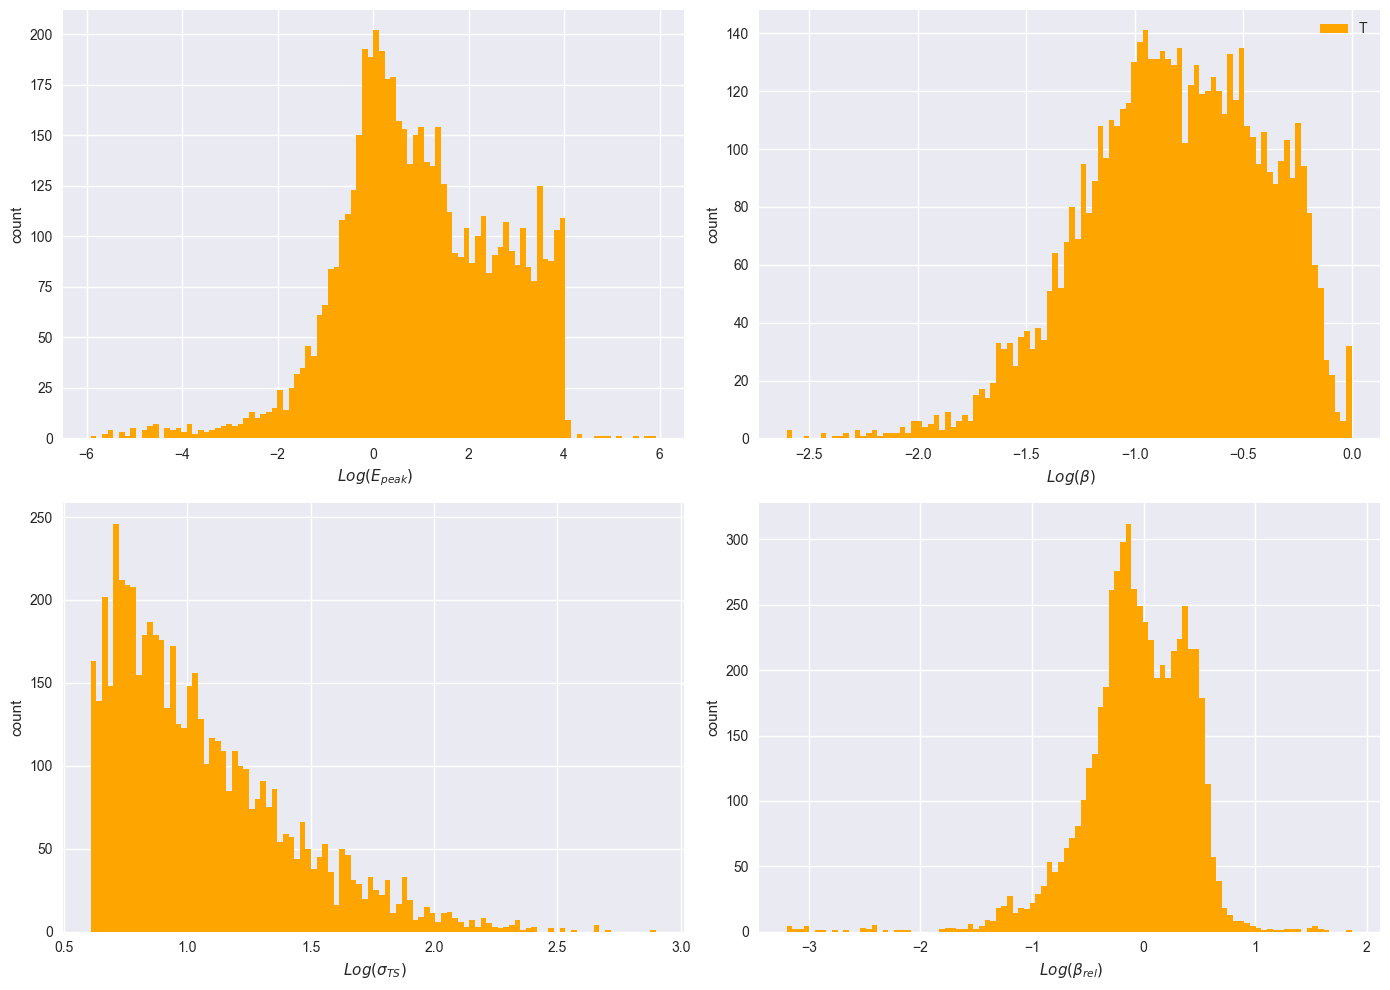

In [412]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#colors = ['red', 'tan', 'lime']
ax0.hist(X_bal_log_Rel_data[:,[0]], 100, color='orange')
#ax0.hist(DM_log_bal_Rel[:,[0]], 100, color='m')
#ax0.hist(unids_log[:,[0]], 100, color='red')
#ax0.legend(prop={'size': 10})
#ax0.set_title('Epeak distribution')
ax0.set_xlabel(r' $Log(E_{peak})$')
ax0.set_ylabel('count')

ax1.hist(X_bal_log_Rel_data[:,[1]], 100, color='orange')
#ax1.hist(DM_log_bal_Rel[:,[1]], 100, color='m')
#ax1.hist(unids_log[:,[1]], 100,color='red')
ax1.legend(('TOT: Astro+DM'))
#ax1.set_title('Beta distribution')
ax1.set_xlabel(r' $Log(\beta)$')
ax1.set_ylabel('count')

ax2.hist(X_bal_log_Rel_data[:,[2]], 100, color='orange')
#ax2.hist(DM_log_bal_Rel[:,[2]], 100, color='m')
#ax2.hist(unids_log[:,[2]], 100, color='red')
#ax2.set_title('sigma distribution')
ax2.set_xlabel(r' $Log(\sigma_{TS})$')
ax2.set_ylabel('count')


ax3.hist(X_bal_log_Rel_data[:,[3]], 100, color='orange')
#ax3.hist(DM_log_bal_Rel[:,[3]], 100, color='m')
#ax3.hist(unids_log[:,[3]], 100, color='red')
#ax3.set_title('beta_err distribution')
ax3.set_xlabel(r' $Log(\beta_{rel})$')
ax3.set_ylabel('count')



fig.tight_layout()
plt.show()

#fig.savefig("histo_tot_data_bal.pdf", bbox_inches='tight')

In [413]:
print('sigma max',10**X_bal_log_Rel_data[:,2].max())
print('sigma min',10**X_bal_log_Rel_data[:,2].min())
print('log sigma max',X_bal_log_Rel_data[:,2].max())
print('log sigma min',X_bal_log_Rel_data[:,2].min())
np.log10(100)

sigma max 792.6913000000003
sigma min 4.056
log sigma max 2.89910409172093
log sigma min 0.6080979463252796


np.float64(2.0)

In [414]:
NDM_sample=0

for i in range(0,len(Y)):
       if Y[i]==1: 
        NDM_sample=NDM_sample+1

print (NDM_sample)

Nastro_sample=0

for i in range(0,len(Y)):
       if Y[i]==0: 
        Nastro_sample=Nastro_sample+1
        
print (Nastro_sample)        

2831
2831


In [415]:

X_log=X_bal_log_Rel_data

#normalizer = sklearn.preprocessing.StandardScaler()
#normalizer.fit(X_log)
#print('StandardSaler mean', normalizer.mean_)
#X_log = normalizer.transform(X_log)

#X_log = np.log10(X_log)

print(X_log.shape)
print(X_log[1:5,0])
print(X_log[1:5,1])


print(Y.shape)

(5662, 4)
[0.70814035 0.22474019 0.25731851 0.32611046]
[-1.73752546e-04 -5.81201709e-01 -5.61932550e-01 -1.10017950e+00]
(5662,)


In [416]:

unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1,2,3]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 4)


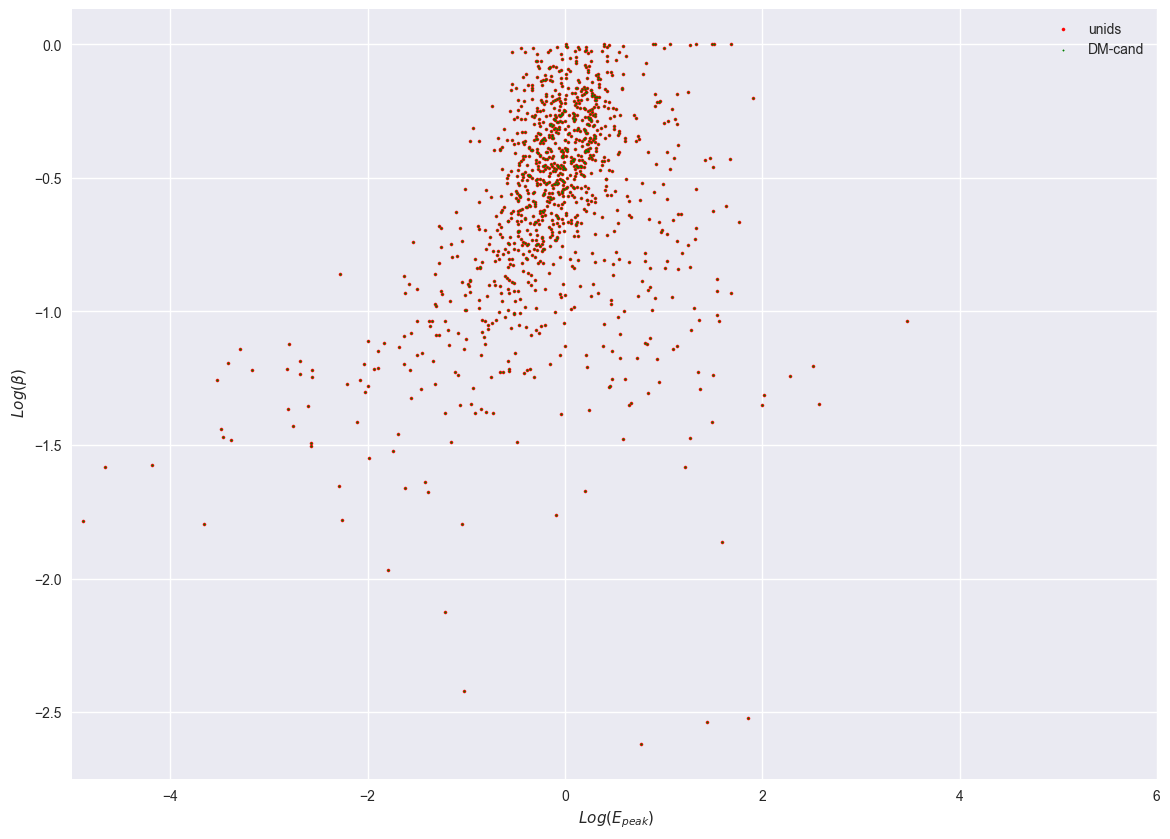

In [417]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids',s=5)
plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
          color='green',label='DM-cand',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

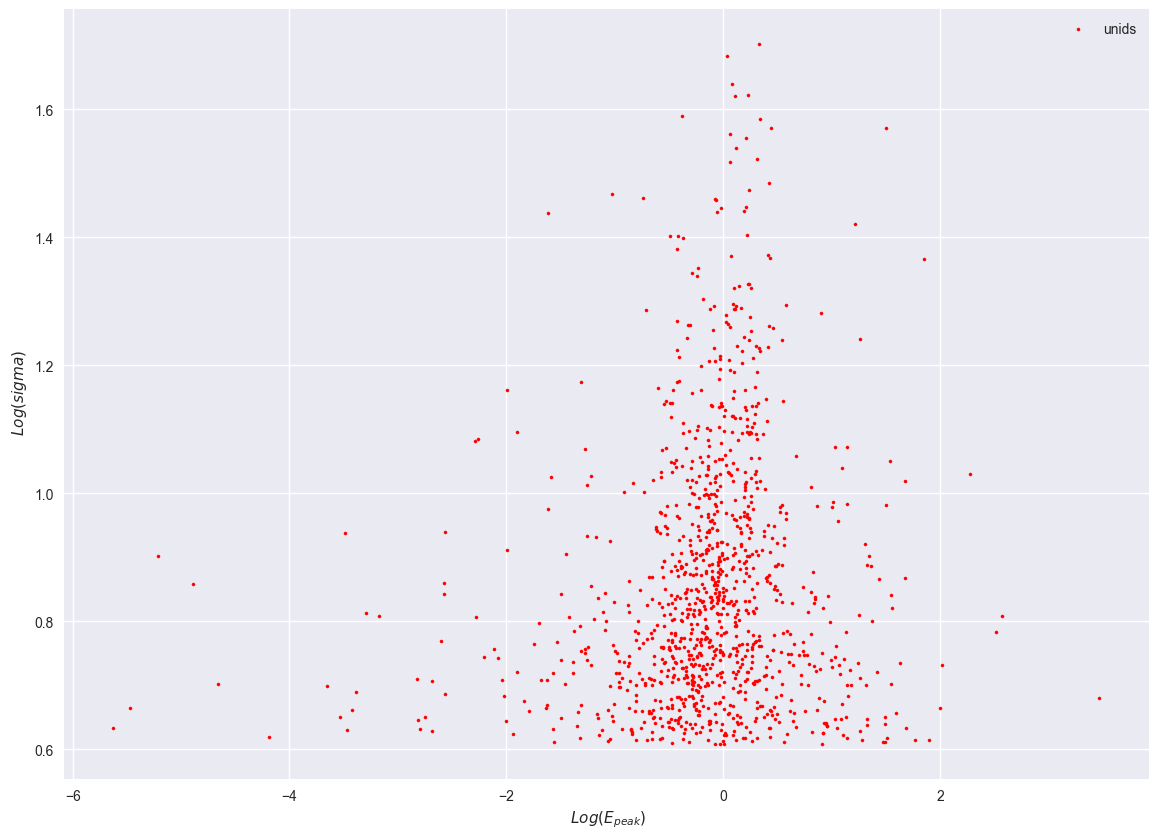

In [418]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.scatter(unids_log[:,0],unids_log[:,2], color='red',label='unids',s=5)
#plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
         # color='green',label='DM-cand',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(sigma)$')
plt.xlabel(r' $Log(E_{peak})$')
#plt.xlim(-5,6)

plt.legend()
plt.show()

# ANN

In [419]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [420]:

### n_activation_cells = np.arange(1, 100, 100//20)
#hidden_layers = (n_activation_cells, n_activation_cells)
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#classifier = MLPClassifier(solver='adam', alpha=0.0, batch_size=120, 
#hidden_layer_sizes=(11, 1), learning_rate_init=0.015, max_iter=1000, random_state=0, activation='relu')

N_cells = np.arange(1, 110, 10)
hidden_layers_1 = [ (n_cells,)  for n_cells in N_cells  ]
hidden_layers_2 = [ (n_cells, n_cells)  for n_cells in N_cells  ]
#hidden_layers_3 = [ (n_cells, n_cells, n_cells)  for n_cells in N_cells  ]
#hidden_layers_4 = [ (n_cells, n_cells, n_cells, n_cells)  for n_cells in N_cells  ]

params = [{'model__hidden_layer_sizes': hidden_layers_1},
         {'model__hidden_layer_sizes': hidden_layers_2},
         #{'model__hidden_layer_sizes': hidden_layers_3},
         #{'model__hidden_layer_sizes': hidden_layers_4},
         ]

steps = [ ('scaler', StandardScaler()),
         ('model', MLPClassifier(solver='adam', alpha=0.0, batch_size=120, hidden_layer_sizes=params, learning_rate_init=0.015, max_iter=1000, random_state=None, activation='relu') ) ] #1e-4 es la default así que no cambia nada

pipe = Pipeline(steps)



In [421]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalizer = sklearn.preprocessing.StandardScaler()

N_splits=5 #25% of testing set with N_splits=4, but we lost the easy 5 statitics in each bin
N_Repeats=1
#N_sample=N_splits*N_Repeats

OA=[]
TN=[]
TP=[]
#unIDs_std_proba_check_repeated_rs_stats_all=np.array((1,))

#OA_rs_stats=open("OA_rs_stats.txt", "w")
#OA_rs_stats.write('seed_value OA \n') 
#TN_rs_stats=open("TN_rs_stats.txt", "w")
#TN_rs_stats.write('seed_value TN \n') 
#TP_rs_stats=open("TP_rs_stats.txt", "w")
#TP_rs_stats.write('seed_value TP \n') 

unids_DM_std_proba_check_repeated_kfold_rskf_4F_21=open("unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.txt", "w")
unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.write('Numb unids_DM_proba_check_repeated_kfold \n') 



rskf = RepeatedStratifiedKFold(n_splits=N_splits, n_repeats=N_Repeats)
rskf.get_n_splits(X_log, Y)
print('rskf',rskf)
ANN = MLPClassifier(solver='adam', alpha=0.0, batch_size=120, hidden_layer_sizes=(21,), 
                 learning_rate_init=0.015, max_iter=1000, random_state=None, activation='relu')
    
for train_index, test_index in rskf.split(X_log, Y):
        print('train_index',train_index.shape, "test_index", test_index.shape)
        X_train_split, X_test_split = X_log[train_index], X_log[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]
        normalizer.fit(X_train_split)
        X_train_split_std=normalizer.transform(X_train_split)
        X_test_split_std=normalizer.transform(X_test_split)
    
        ANN_fit=ANN.fit(X_train_split_std, Y_train_split)
        Y_test_split_01_std_check=ANN_fit.predict(X_test_split_std)
        Y_test_split_proba_std_check=ANN_fit.predict_proba(X_test_split_std)
        
        OA.extend([accuracy_score(Y_test_split, Y_test_split_01_std_check)])
        conf_matrix=sklearn.metrics.confusion_matrix(Y_test_split, Y_test_split_01_std_check, normalize='true')
        TN.extend([conf_matrix[0,0]])
        TP.extend([conf_matrix[1,1]])
           
        unids_std_check=normalizer.transform(unids_log)
        unIDs_std_proba_check_repeated_kfold=ANN_fit.predict_proba(unids_std_check)
        
        for i in range(0,len(unids_std_check)):
                #unIDs_std_proba_check_repeated_rs_stats_all[i]=np.append(ANN_fit.predict_proba(unids_std_check)[i,1])
                unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.write('{} {} \n'.format(i, 
                                                                    unIDs_std_proba_check_repeated_kfold[i,1])) 

       # OA_rs_stats.write('{} {} \n'.format(seed_value[j], OA[j]))
        #TN_rs_stats.write('{} {} \n'.format(seed_value[j], TN[j]))
        #TP_rs_stats.write('{} {} \n'.format(seed_value[j], TP[j]))  
    
unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.close()

#OA_rs_stats.close()
#TN_rs_stats.close()
#TP_rs_stats.close()

print('X_train_split.shape', X_train_split.shape)
print('X_test_split.shape', X_test_split.shape)

#unIDs_std_proba_check_repeated_rs_stats=np.array(unIDs_std_proba_check_repeated_rs_stats)
#print('unIDs_std_proba_check_repeated_rs_stats.shape',unIDs_std_proba_check_repeated_rs_stats.shape)
#print(unIDs_std_proba_check_repeated_rs_stats[0:3,:])

OA=np.array(OA)
#OA=np.reshape(OA,(len(unids_std_check),(N_sample)))
TN=np.array(TN)
#TN=np.reshape(TN,(len(unids_std_check),(N_sample)))
TP=np.array(TP)
#TP=np.reshape(TP,(len(unids_std_check),(N_sample)))

rskf RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
X_train_split.shape (4530, 4)
X_test_split.shape (1132, 4)


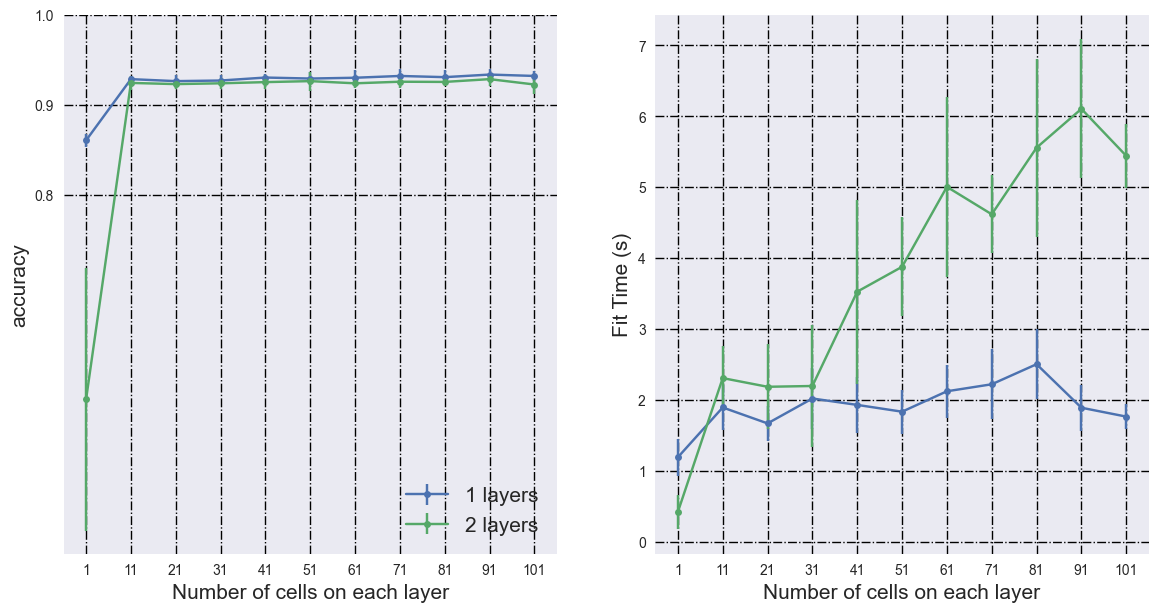

In [422]:
# %matplotlib widget
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold

fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
#fig.suptitle('ANN Best Hyper-parameters (2Features & 2Classes)', fontsize=16)

best_score = 0
for i, param in enumerate(params):
    #params = {'model__hidden_layer_sizes': (N_cells,)}
    search = GridSearchCV(pipe, param, scoring='accuracy', n_jobs=-1, 
                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)).fit(X_train_split, Y_train_split)
    
    grid_results = pd.DataFrame( search.cv_results_ )
    
    
    # MAKE THE PLOT
    axs[0].errorbar(N_cells, grid_results['mean_test_score'], yerr=grid_results['std_test_score'], 
                  fmt='-o', ms=5, mec='k', capsize=4, label= str(i+1)+' layers' )
    axs[0].set_xlabel('Number of cells on each layer', fontsize=15)
    axs[0].set_ylabel('accuracy', fontsize=15)
    axs[0].grid(linestyle='-.', color='k')
    
    axs[1].errorbar(N_cells, grid_results['mean_fit_time'], yerr=grid_results['std_fit_time'],
                   fmt='-o', ms=5, mec='k', capsize=4 )
    
    axs[0].set_xticks(np.arange(1, 110, step=10))
    axs[0].set_yticks(np.arange(0.8, 1.01, step=0.1))
    axs[1].set_xlabel('Number of cells on each layer', fontsize=15)
    axs[1].set_ylabel('Fit Time (s)', fontsize=15)
    axs[1].grid(linestyle='-.', color='k')
    axs[0].legend(fontsize=15)
    
    #print(search.cv_results_ )

In [423]:
import math

x_min, x_max = -6.5, 6.5 #Log[Epeak]
y_min, y_max = -7.5, 0.5 #Log[Beta] (including truncated sample values, i.e. bmin-bmin_err>0.0)
z_min, z_max = 0.0, 2.89 #Log[sigma_det] (including unids_min y sigma_det max ORIGINAL sample= TRUNCATED)
#k_min, k_max = -7.5, 0.5
k_min, k_max = X_log[:, 3].min(), X_log[:, 3].max()

print(x_min,x_max,y_min,y_max,z_min,z_max,k_min,k_max)

hx=0.1
hy=0.1  # step size in the mesh
hz=0.1
hk=0.1

xx, yy, zz, kk= np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy),np.arange(z_min, z_max, hz),np.arange(k_min, k_max, hk))

#xx, yy, zz, kk= np.meshgrid(np.linspace(x_min, x_max, 100, endpoint=True), np.linspace(y_min, y_max, 120, endpoint=True),np.linspace(z_min, z_max, 100, endpoint=True),np.linspace(k_min, k_max, 100, endpoint=True))

Z_classifier_sample= ANN_fit.predict_proba(np.c_[xx.ravel(), yy.ravel(),zz.ravel(), kk.ravel()])

print(Z_classifier_sample.shape)
print(Z_classifier_sample[0:5])
#print(Z_liblin[1267728-5:1267728])
print(xx.shape)
print(yy.shape)
#print(zz[1,:].shape)
#print(xx[:,0:5])
print('xsize',np.arange(x_min, x_max, hx).shape)
print('ysize',np.arange(y_min, y_max, hy).shape)
#print('zsize',np.arange(z_min, z_max, hz).shape)
print(xx.shape)
#print(yy[:,:,0].shape)

-6.5 6.5 -7.5 0.5 0.0 2.89 -3.1986570869544226 1.8669662999160774
(15381600, 2)
[[1.00000000e+000 7.79418202e-192]
 [1.00000000e+000 3.92740660e-192]
 [1.00000000e+000 1.97897901e-192]
 [1.00000000e+000 9.97186776e-193]
 [1.00000000e+000 5.02471962e-193]]
(80, 130, 29, 51)
(80, 130, 29, 51)
xsize (130,)
ysize (80,)
(80, 130, 29, 51)


In [424]:
Y_test_color=np.asarray(Y_test_split[:],dtype='str')

print(len(Y_test_split))
print(Y_test_color.shape)

for i in range(0,len(Y_test_split)):
    if Y_test_split[i]==1:
        Y_test_color[i]='k'
    elif Y_test_split[i]==0:
         Y_test_color[i]='w'
            

print(Y_test_color) 

1132
(1132,)
['w' 'w' 'w' ... 'k' 'k' 'k']


(15381600, 2)


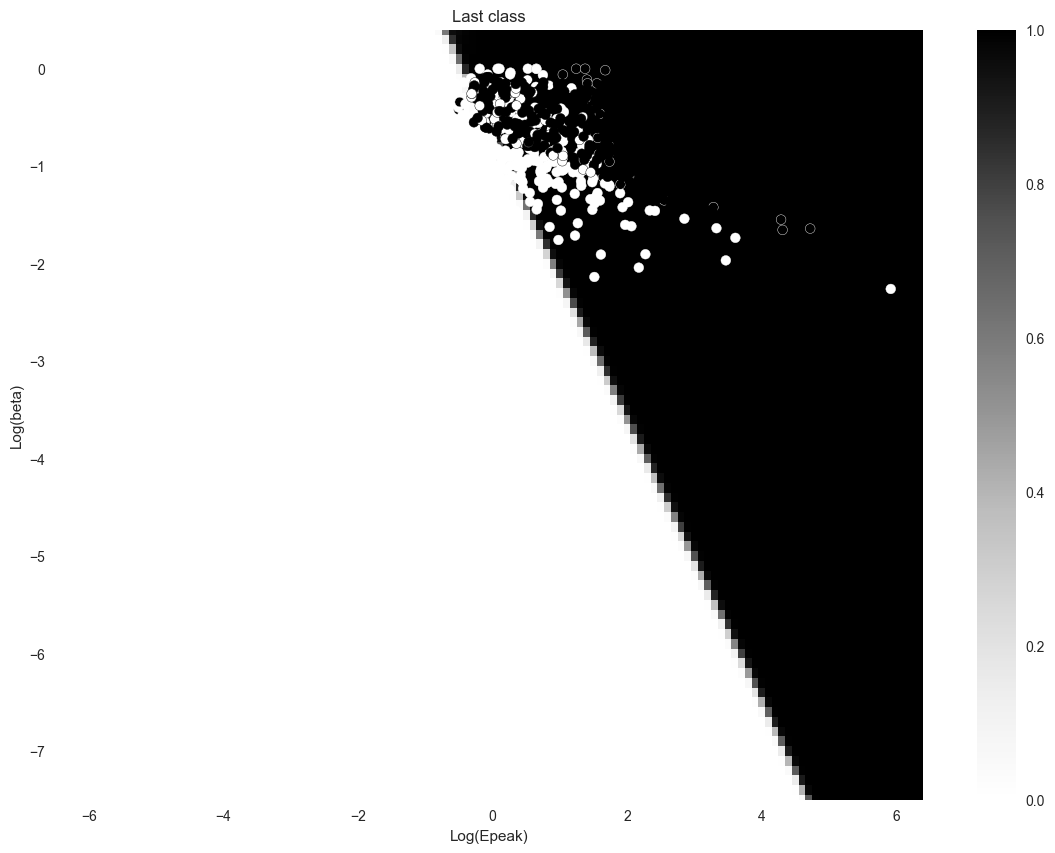

In [425]:
# Put the result into a color plot
#Z_liblin = Z_liblin.reshape((xx.shape, yy.shape))
Z_classifier_sample_1 = Z_classifier_sample[:,1].reshape(yy.shape)
print(Z_classifier_sample.shape)
#f=plt.figure(1, figsize=(4, 3))
f=plt.figure()
plt.pcolormesh(xx[:,:,0,0], yy[:,:,0,0], Z_classifier_sample_1[:,:,0,0])
#plt.colorbar()
#plt.pcolormesh(xx, yy, Z_classifier_0, cmap=plt.cm.PiYG)

# Plot also the training points

Y_test_split_proba_std_check

test=plt.scatter(X_test_split[:, 0],X_test_split[:, 1], c=Y_test_split_01_std_check[:], edgecolors=Y_test_color[:])
#train=plt.scatter(X_train_split[:, 0],X_test[:, 1], c=Y_test_classifier[:,1], edgecolors='k')
#unids=plt.scatter(unids_cut[:, 2], unids_cut[:, 0], c=Y_unids_liblin, edgecolors='m', cmap=plt.cm.Paired)
#test=plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_fit_liblin, edgecolors='c', cmap=plt.cm.Paired)

#plt.yscale('log',basey=10) 
#plt.xscale('log',basex=10) 
plt.title('Last class')
plt.ylabel('Log(beta)')
plt.xlabel('Log(Epeak)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.ylim(zz.min(), zz.max()+1000)
#plt.legend((test, ), ('test',))


#plt.legend((train, test, unids),
 #          ('train', 'test', 'unids'),
  #         scatterpoints=1,
   #        loc='lower left',
    #       ncol=3,
     #      fontsize=8)
#plt.show()

#plt.imshow(Z_classifier_sample_1[:,:,0,0],aspect='auto')
plt.colorbar()
plt.clim(0.0,1.0);


#f.savefig("NN_proba_4F_bal.pdf", bbox_inches='tight')
#f.savefig("plot/test_Fit11_prob_class_E_beta.jpg", format='jpg',bbox_inches='tight', dpi=100, quality=100)

(15381600, 2)


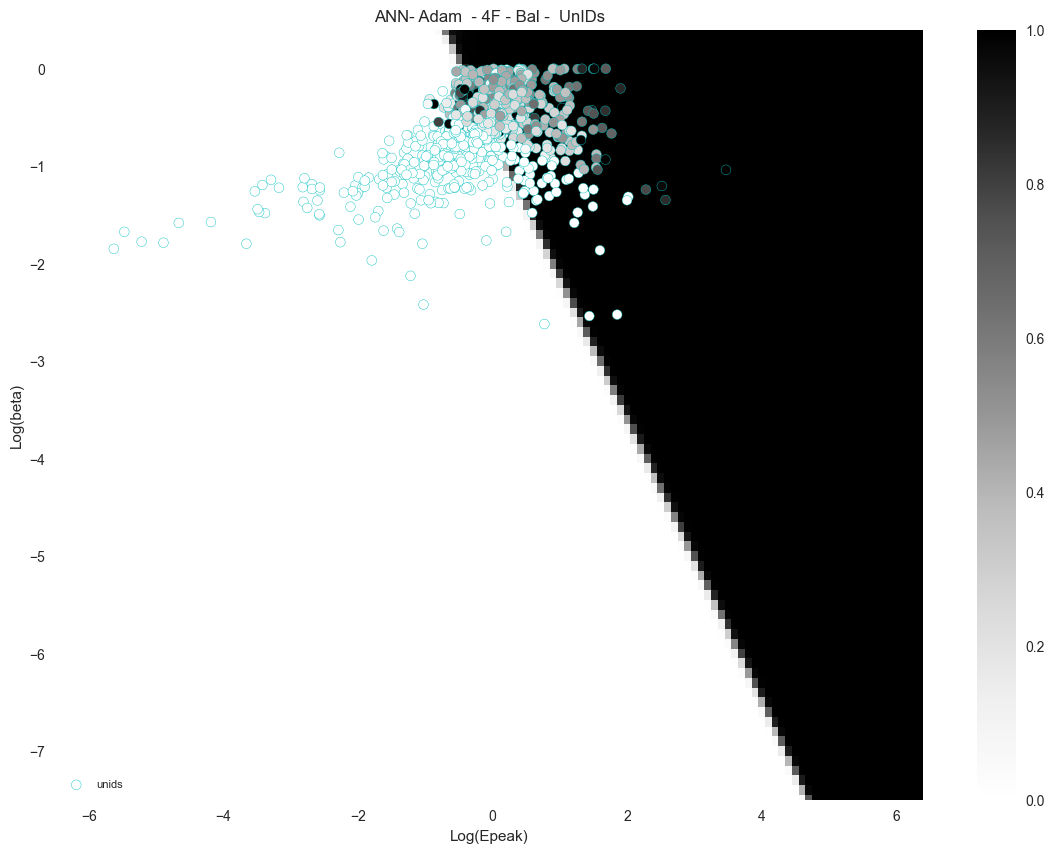

In [426]:
#Put the result into a color plot
#Z_liblin = Z_liblin.reshape((xx.shape, yy.shape))
Z_classifier_sample_1 = Z_classifier_sample[:,1].reshape(yy.shape)
print(Z_classifier_sample.shape)
#f=plt.figure(1, figsize=(4, 3))
f=plt.figure()
plt.pcolormesh(xx[:,:,0,0], yy[:,:,0,0], Z_classifier_sample_1[:,:,0,0])
plt.colorbar()
plt.clim(0.0,1.0);
#plt.pcolormesh(xx, yy, Z_classifier_0, cmap=plt.cm.PiYG)

# Plot also the training points


#test=plt.scatter(X_test_split[:, 0],X_test_split[:, 1], c=Y_test_split_proba_std_check[:,1], edgecolors=Y_test_color[:])

#test=plt.scatter(X_test[:, 0],X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.PiYG)
#test=plt.scatter(X_test[:, 0],X_test[:, 1], c=Y_test_classifier[:,1], edgecolors='k')
unids=plt.scatter(unids_log[:, 0], unids_log[:, 1], c=unIDs_std_proba_check_repeated_kfold[:,1], edgecolors='c')
#test=plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_fit_liblin, edgecolors='c', cmap=plt.cm.Paired)

#plt.yscale('log',basey=10) 
#plt.xscale('log',basex=10) 
plt.title('ANN- Adam  - 4F - Bal -  UnIDs')
plt.ylabel('Log(beta)')
plt.xlabel('Log(Epeak)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.ylim(zz.min(), zz.max()+1000)
#plt.legend('train')


plt.legend((unids,),
          ('unids',),
          scatterpoints=1,
           loc='lower left',
           ncol=3,
          fontsize=8)
plt.show()

#plt.imshow(Z_classifier_sample_1[:,:,0,0],aspect='auto')



#f.savefig("NN_4F_BAL_unIDs.pdf", bbox_inches='tight')
#f.savefig("plot/test_Fit11_prob_class_E_beta.jpg", format='jpg',bbox_inches='tight', dpi=100, quality=100)

In [427]:
print(OA.shape)
#print(OA)
print('OA mean', OA.mean(), 'OA std',OA.std(ddof=1))
print('TN mean', TN.mean(), 'TN std',TN.std(ddof=1))
print('TP mean', TP.mean(), 'TP std',TP.std(ddof=1))
print(unIDs_std_proba_check_repeated_kfold.shape)

(5,)
OA mean 0.9247653903611226 OA std 0.01062436729305924
TN mean 0.9413683075638317 TN std 0.016471798361769173
TP mean 0.9081733256055987 TP std 0.02454926369353414
(1125, 2)


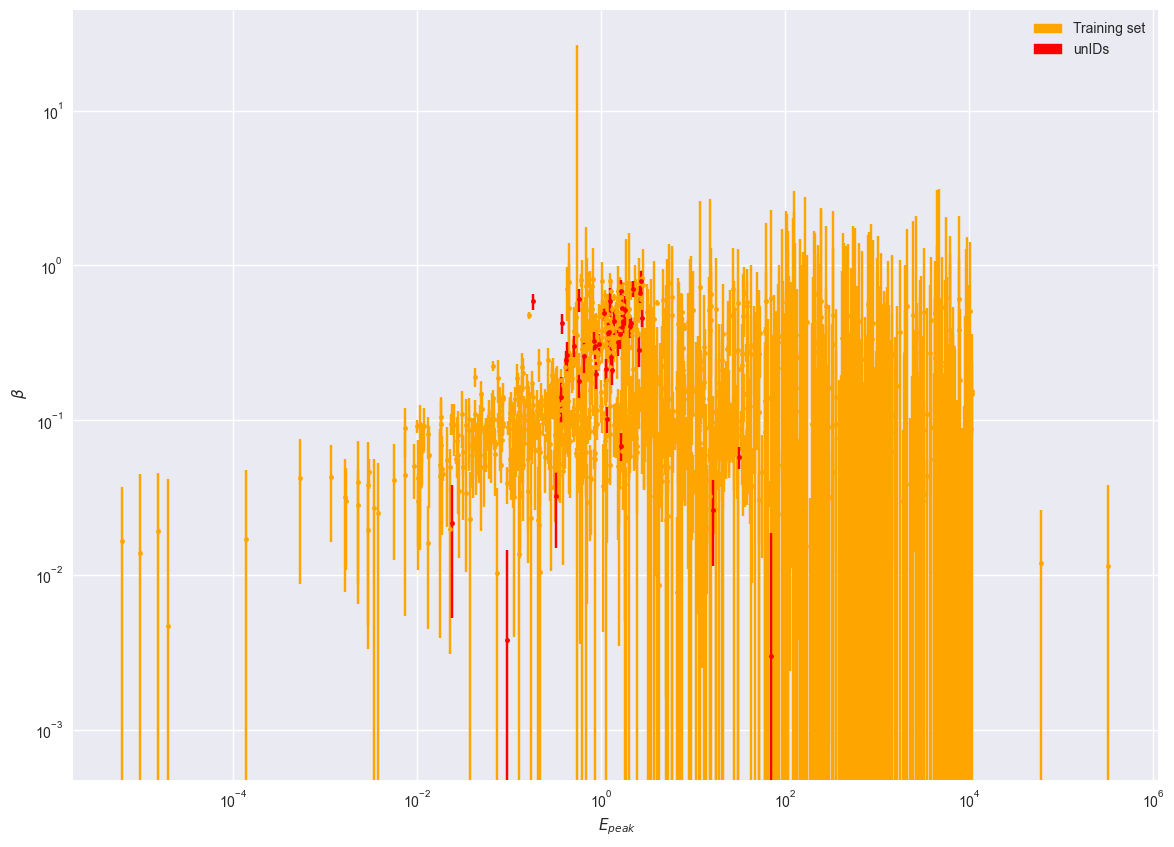

In [428]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


f = plt.figure()

for j in range(0,len(X_train_split_std)):
        if 10**X_train_split[j,2]>=20:      
            plt.errorbar(10**X_train_split[j,0],10**X_train_split[j,1], yerr=10**X_train_split[j,3]*10**X_train_split[j,1], fmt=".", color='orange',label='X_train_split')

for i in range(0,len(unids_log)):
    if 10**unids_log[i,2]>=20:
            plt.errorbar(10**unids_log[i,0],10**unids_log[i,1], yerr=10**unids_log[i,3]*10**unids_log[i,1], fmt=".", color='red',label='unIDs')    

#plt.errorbar(10**unids_std_check[i,0],10**unids_std_check[i,1], yerr=10**unids_std_check[i,3]*10**unids_std_check[i,1], fmt=".", color='red')
        
        #and X_train_split_std[j,2]>=50: 
#plt.scatter(10**unids_log[:,0],10**unids_log[:,1], color='red',label='unids log',s=5)
#plt.errorbar(10**unids_log[:,0],10**unids_log[:,1], yerr=10**unids_log[:,3]*10**unids_log[:,1],
            # fmt=".", color='red',label='unIDs')
#plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
 #         color='green',label='unids lin data',s=1)
#plt.errorbar(10**X_train_split_std[:,0],10**X_train_split_std[:,1], yerr=10**X_train_split_std[:,3]*10**X_train_split_std[:,1],
            # fmt=".", color='orange',label='X_train_split')     
           
#plt.scatter(unids_std_check[:,0],unids_std_check[:,1],
        #  color='blue',label='unids norm',s=1)
  # yerr=10**unids_log[index_selected[i],3]*10**unids_log[index_selected[i],1]
          # plt.scatter(10**X_train_split_std[j,0],10**X_train_split_std[j,1], color='orange',label='X_train_split',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $\beta$')
plt.xlabel(r' $E_{peak}$')
plt.yscale('log',base=10) 
plt.xscale('log',base=10) 

orange_patch = mpatches.Patch(color='orange', label='Training set')
red_patch = mpatches.Patch(color='red', label='unIDs')
plt.legend(handles=[orange_patch,red_patch])

#plt.legend()
plt.show()


#fig.savefig("Trainig_unIDs_errors_sigma20.pdf", bbox_inches='tight')

In [429]:
from matplotlib.patches import Patch

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.5],
        xlim=[0, len(X_log)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by RepeatedStratifiedKFold
  warnings.warn(
/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


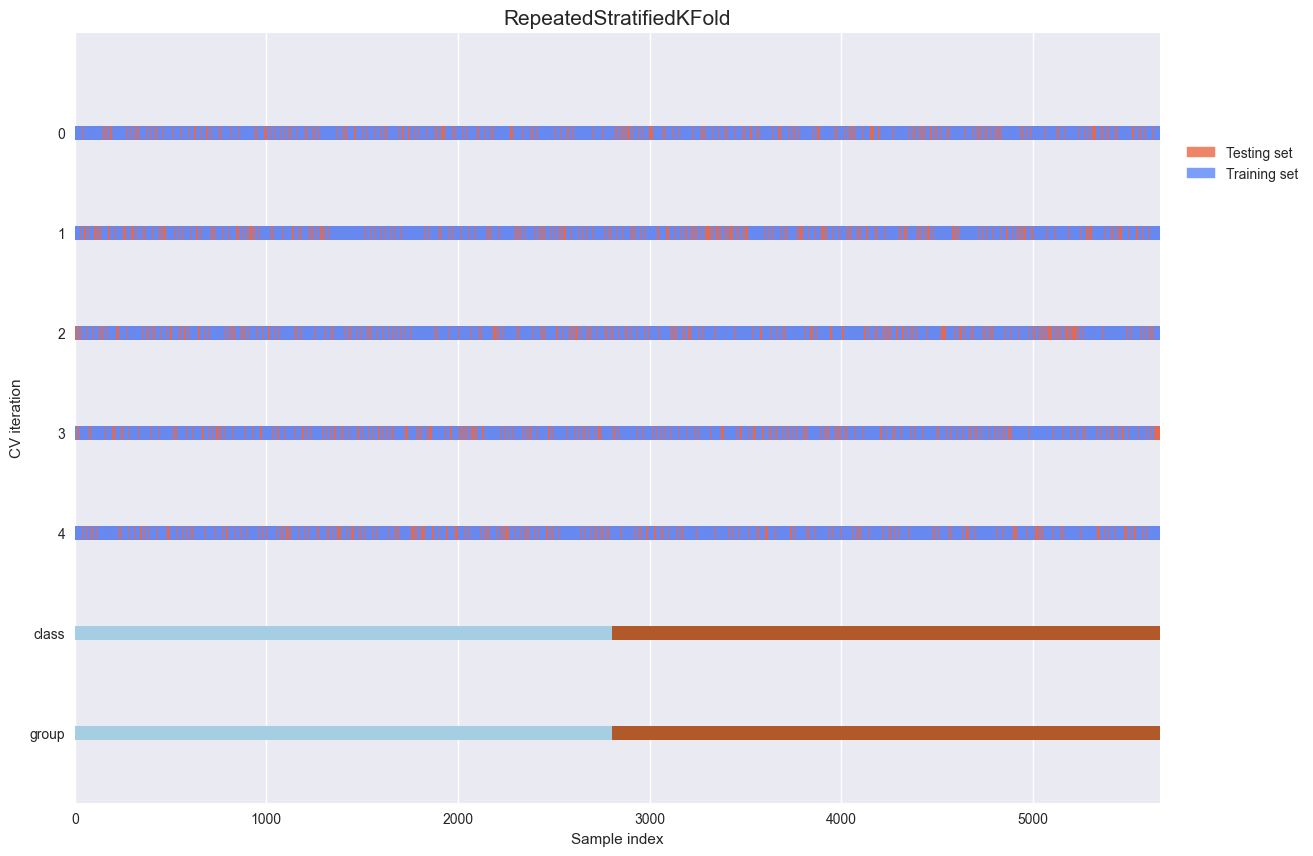

In [430]:
fig, ax = plt.subplots()
cv = rskf
plot_cv_indices(cv, X_log , Y, Y ,ax, N_splits*N_Repeats)
ax.axes
ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.2))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )

#fig.savefig("Reapeated5_Kfold5_split.pdf", bbox_inches='tight')

# unIDs classification with errors

In [431]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [432]:

unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1,2,3]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 4)


In [433]:

unids_DM_std_proba_repeated_kfold= np.genfromtxt('unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.txt',dtype='str') 
unids_DM_std_proba_data_repeated_kfold=np.asarray(unids_DM_std_proba_repeated_kfold[1::],dtype=float)
print(unids_DM_std_proba_data_repeated_kfold[0,:])
print(unids_DM_std_proba_data_repeated_kfold[1,:])

#N_splits=5
#N_Repeats=20

print('unids_DM_std_proba_data_repeated_kfold.shape',unids_DM_std_proba_data_repeated_kfold.shape)
print(unids_DM_std_proba_data_repeated_kfold[0,0:3])
print(unids_DM_std_proba_data_repeated_kfold[1,0:3])
print(unids_DM_std_proba_data_repeated_kfold[2,0:3])

[0.         0.00011043]
[1.         0.24814869]
unids_DM_std_proba_data_repeated_kfold.shape (5625, 2)
[0.         0.00011043]
[1.         0.24814869]
[2.         0.41946079]


In [434]:

#defining an array where each column is the probability to be DM for each unIDs in each split

import itertools 

N_unids=unids_log.shape[0]
print('N_unids',N_unids)

N_sample=N_splits*N_Repeats
print('N_sample',N_sample)

print(unids_DM_std_proba_data_repeated_kfold.shape)

unids_number=unids_DM_std_proba_data_repeated_kfold[0:N_unids,0]

print('unids number',unids_number)
print('unids number shape',unids_number.shape)

unids_DM_std_proba_N_sample_repeated_kfold=np.zeros((N_unids,(N_sample+1)))

unids_DM_std_proba_N_sample_repeated_kfold[:,0]=unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)]=np.reshape(
unids_DM_std_proba_data_repeated_kfold[:,1],(N_unids,(N_sample)))

print('unids_DM_std_proba_N_sample_repeated_kfold.shape', 
      unids_DM_std_proba_N_sample_repeated_kfold.shape)
print(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_DM_std_proba_N_sample_repeated_kfold=np.array(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_int_prob=float((unids_DM_std_proba_N_sample_repeated_kfold[:,1].T))
#print(unids_int_prob)

N_unids 1125
N_sample 5
(5625, 2)
unids number [0.000e+00 1.000e+00 2.000e+00 ... 1.122e+03 1.123e+03 1.124e+03]
unids number shape (1125,)
unids_DM_std_proba_N_sample_repeated_kfold.shape (1125, 6)
[[0.00000000e+00 1.10431750e-04 2.48148693e-01 4.19460791e-01
  8.22498373e-02 2.93685262e-01]
 [1.00000000e+00 7.67319408e-07 1.19432523e-06 3.52835984e-05
  1.27262569e-01 2.83825064e-03]
 [2.00000000e+00 9.12546081e-12 3.06563371e-17 1.11151736e-01
  2.34703812e-26 1.40620669e-01]
 ...
 [1.12200000e+03 4.53538188e-01 2.61988099e-17 2.52744074e-11
  1.52117849e-12 4.73028490e-01]
 [1.12300000e+03 2.34811542e-01 1.60892516e-58 2.62045146e-01
  1.71130437e-01 1.02445455e-06]
 [1.12400000e+03 2.97937134e-41 2.96586448e-01 1.06476353e-09
  9.99636542e-33 3.51476936e-01]]


In [435]:

unids_mean=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].mean(axis=1)
unids_std=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].std(axis=1,ddof=1)
print('unids_mean', unids_mean, 'unids std',unids_std)
print(unids_mean.shape)
p_cut=0.90

unids_mean [0.208731   0.02602761 0.05035448 ... 0.18531334 0.13359763 0.12961268] unids std [0.16785265 0.05660529 0.06973344 ... 0.25384428 0.12634092 0.17853734]
(1125,)


Text(0, 0.5, 'count')

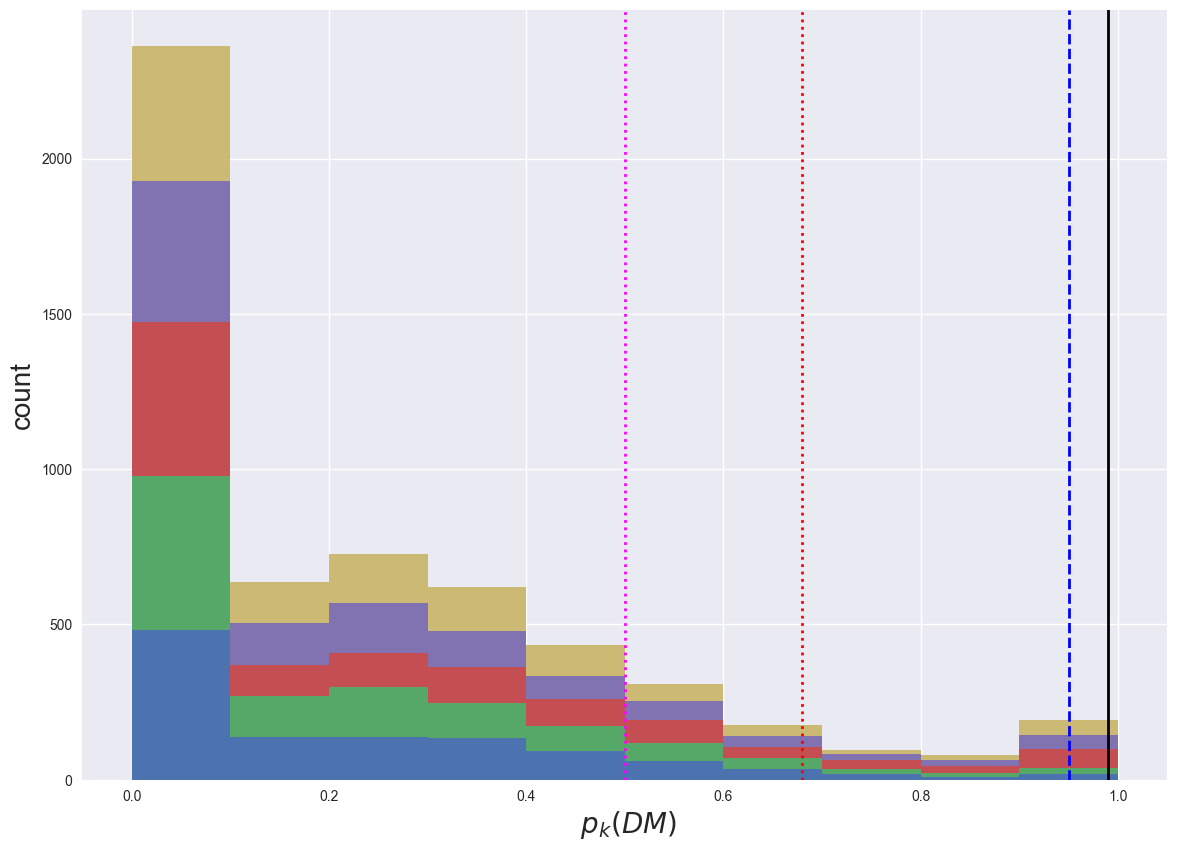

In [436]:
import matplotlib.pyplot as plt

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()

#for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold)):
counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], bins,histtype='bar', stacked='True', density=False, label='all p hist')
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
plt.axvline(0.68, color='red', linestyle=':', linewidth=2)
plt.axvline(0.95, color='blue', linestyle='--', linewidth=2)
plt.axvline(0.99, color='black', linestyle='-', linewidth=2)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k(DM)$',size=20)
plt.ylabel('count',size=20)


#fig.savefig("full_histo_4F.pdf", bbox_inches='tight')


In [437]:
all_color=np.asarray(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)],dtype='str')

print(all_color.shape)

for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)])):
    for j in range(0,N_sample):
        all_color[i,j]='midnightblue'

print(len(unids_log))    
print(all_color.shape)
print(all_color)

(1125, 5)
1125
(1125, 5)
[['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ...
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']]


Text(0.31622776601683794, 1, ' $NN, 4F$')

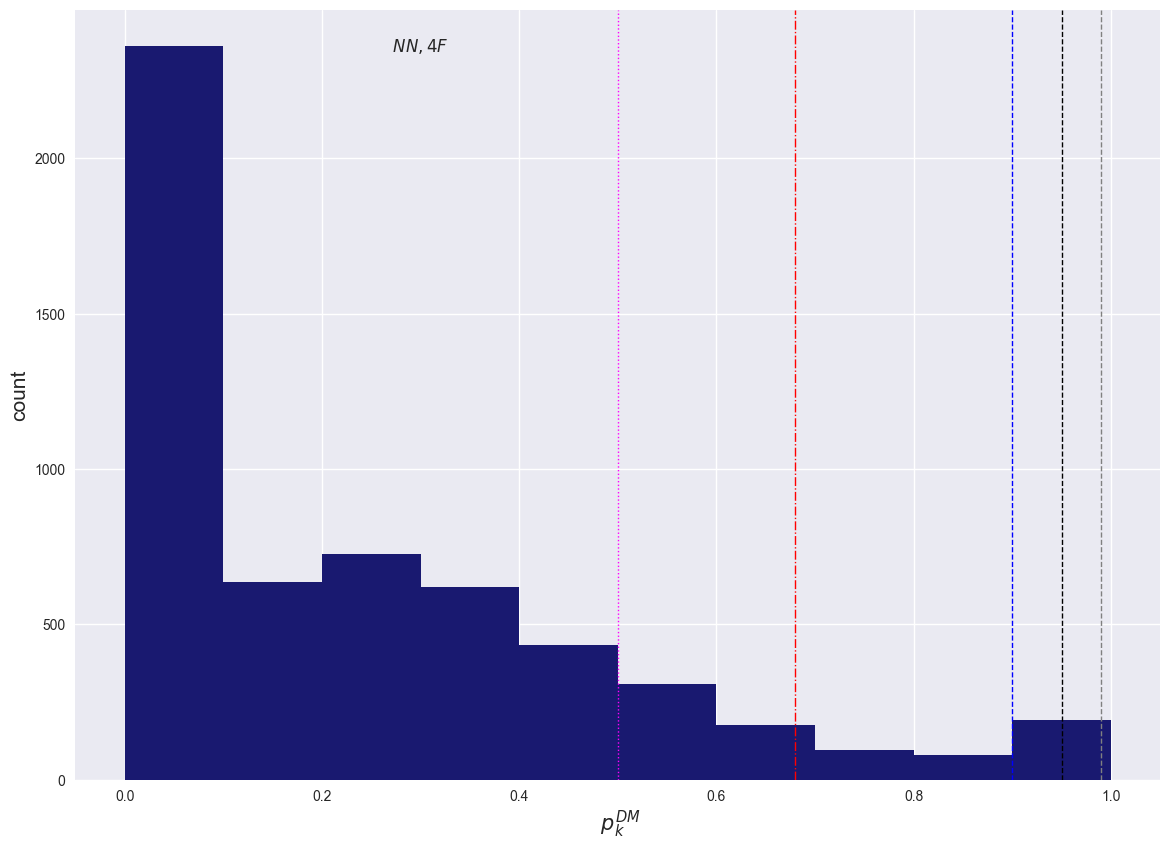

In [438]:
import matplotlib.pyplot as plt

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()

counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                         bins, histtype='barstacked',density=False, color=all_color[i,:])
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=1)
plt.axvline(0.68, color='red', linestyle='-.', linewidth=1)
plt.axvline(0.90, color='blue', linestyle='--', linewidth=1)
plt.axvline(0.95, color='black', linestyle='--', linewidth=1)
plt.axvline(0.99, color='gray', linestyle='--', linewidth=1)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k^{DM}$',size=15)
plt.ylabel('count',size=15)
plt.title(r' $NN, 4F$', y=10**(0), x=10**(-0.5), pad=-30)

#fig.savefig("full_histo_4F_single_count.pdf", bbox_inches='tight')


# TFG Marta - Additional analysis 4F

In [439]:
N_splits = 5
N_Repeats = 1
N_sample = N_splits * N_Repeats

print(f"Cross-validation setup: {N_splits} splits × {N_Repeats} repeats = {N_sample} total folds")


Cross-validation setup: 5 splits × 1 repeats = 5 total folds


In [440]:
unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt', dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::, :], dtype=float)
feature_names = unids_3F[0, :]

print(f"Feature names: {feature_names}")
print(f"UnID data shape: {unids_3F_data.shape}")

# Create log-transformed features - CAMBIO: usar las 4 características
unids_log = np.log10(unids_3F_data[:, [0, 1, 2, 3]])  # E_peak, beta, sigma_det, beta_Rel
print(f"Log-transformed features shape: {unids_log.shape}")

Feature names: ['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
UnID data shape: (1125, 5)
Log-transformed features shape: (1125, 4)


In [441]:
# Extract probability data (excluding index column)
prob_data = unids_DM_std_proba_N_sample_repeated_kfold[:, 1:(N_sample + 1)]

# Compute comprehensive statistics
unids_mean = prob_data.mean(axis=1)
unids_std = prob_data.std(axis=1, ddof=1)
unids_median = np.median(prob_data, axis=1)
unids_q25 = np.percentile(prob_data, 25, axis=1)
unids_q75 = np.percentile(prob_data, 75, axis=1)
unids_min = prob_data.min(axis=1)
unids_max = prob_data.max(axis=1)

print("Statistics computed successfully!")
print(f"Mean probability: {unids_mean.mean():.4f} ± {unids_mean.std():.4f}")
print(f"Mean uncertainty: {unids_std.mean():.4f} ± {unids_std.std():.4f}")
print(f"Median probability: {np.median(unids_mean):.4f}")

Statistics computed successfully!
Mean probability: 0.2343 ± 0.1285
Mean uncertainty: 0.2268 ± 0.1024
Median probability: 0.2234


In [442]:
# Define thresholds
p_cut_high = 0.90      # High confidence threshold
p_cut_moderate = 0.50  # Moderate confidence threshold
uncertainty_threshold = 0.1  # Low uncertainty threshold

# High confidence candidates
high_conf_mask = unids_mean >= p_cut_high
high_conf_indices = np.where(high_conf_mask)[0]

# Moderate confidence candidates
moderate_conf_mask = (unids_mean >= p_cut_moderate) & (unids_mean < p_cut_high)
moderate_conf_indices = np.where(moderate_conf_mask)[0]

# Low uncertainty candidates (consistent predictions)
low_uncertainty_mask = unids_std <= uncertainty_threshold
low_uncertainty_indices = np.where(low_uncertainty_mask)[0]

# Very high confidence (95% threshold)
very_high_conf_mask = unids_mean >= 0.95
very_high_conf_indices = np.where(very_high_conf_mask)[0]

print(f"HIGH CONFIDENCE candidates (≥{p_cut_high:.0%}): {len(high_conf_indices)}")
print(f"VERY HIGH CONFIDENCE candidates (≥95%): {len(very_high_conf_indices)}")
print(f"MODERATE CONFIDENCE candidates ({p_cut_moderate:.0%}-{p_cut_high:.0%}): {len(moderate_conf_indices)}")
print(f"LOW UNCERTAINTY candidates (std ≤{uncertainty_threshold}): {len(low_uncertainty_indices)}")

if len(high_conf_indices) > 0:
    print(f"\nTop high confidence candidates:")
    for i in high_conf_indices[:5]:
        print(f"  Source {i}: p={unids_mean[i]:.4f} ± {unids_std[i]:.4f}")

HIGH CONFIDENCE candidates (≥90%): 0
VERY HIGH CONFIDENCE candidates (≥95%): 0
MODERATE CONFIDENCE candidates (50%-90%): 35
LOW UNCERTAINTY candidates (std ≤0.1): 110


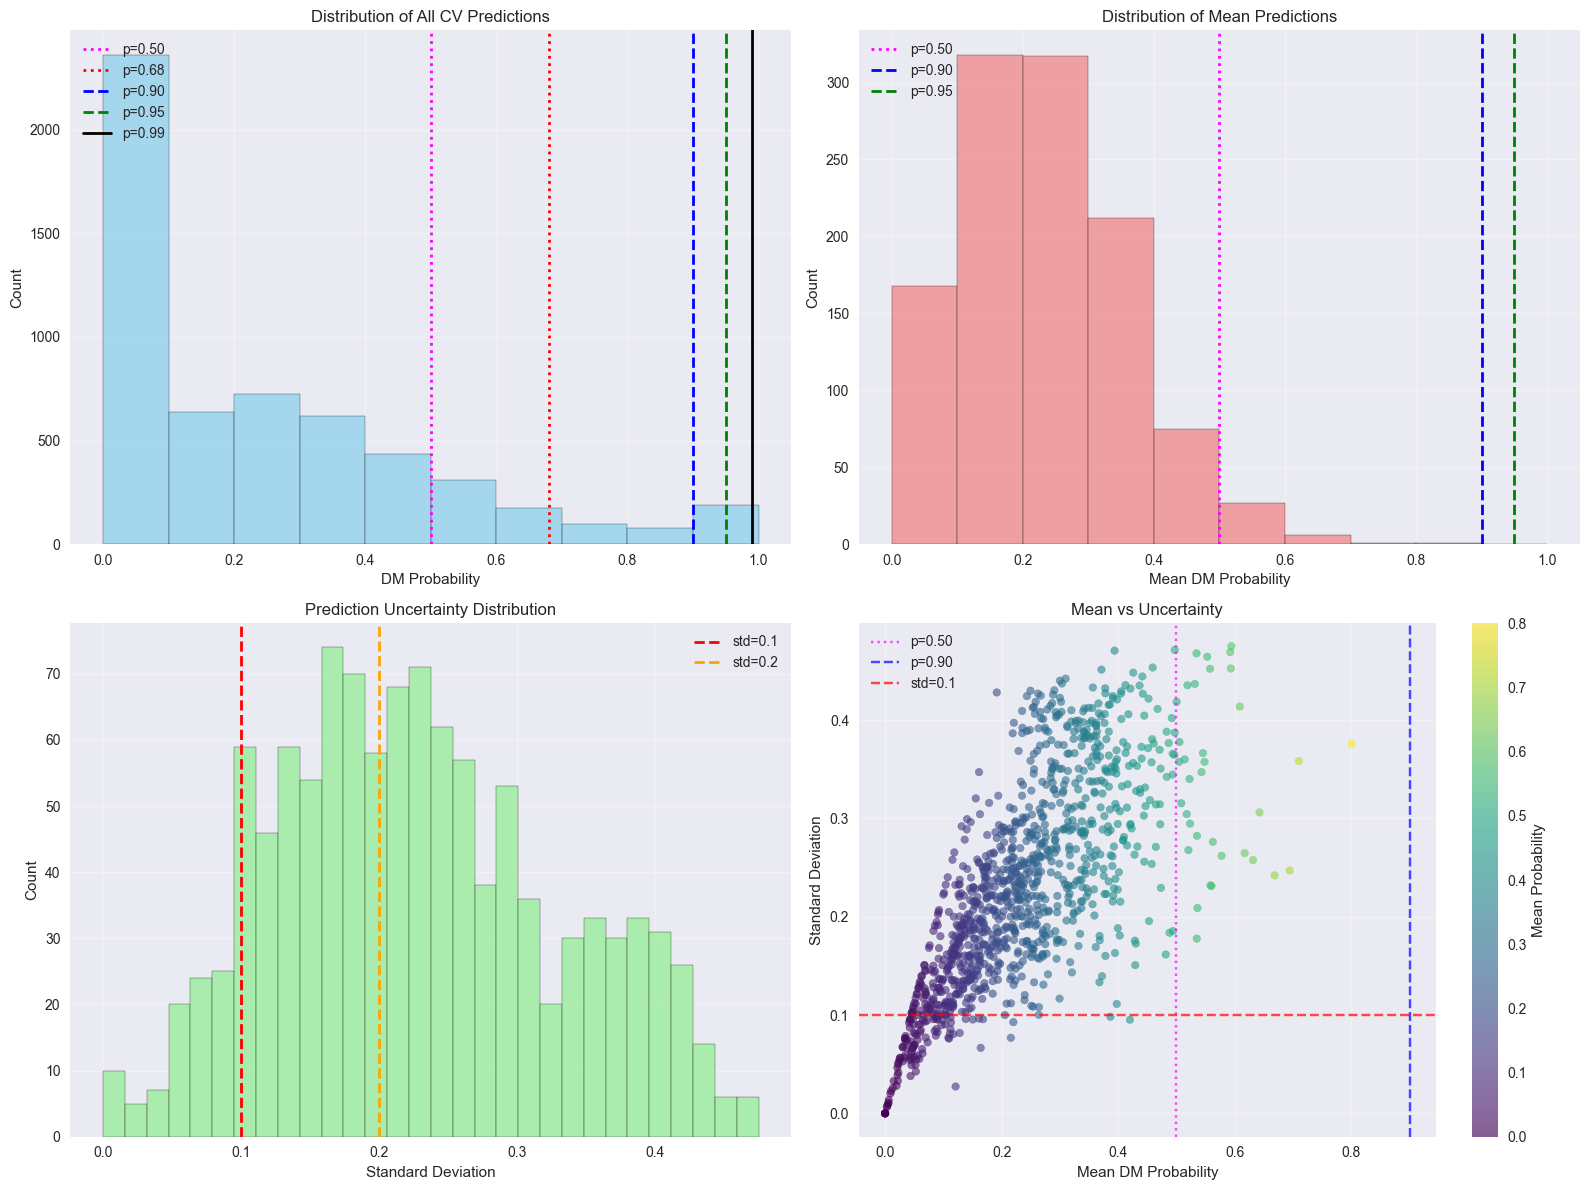

In [443]:
# Create comprehensive probability distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. All predictions histogram (original style)
ax1 = axes[0, 0]
bins = np.arange(0.0, 1.1, 0.1)
counts, bins_edges, _ = ax1.hist(prob_data.flatten(), bins=bins, 
                                alpha=0.7, color='skyblue', edgecolor='black')

ax1.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax1.axvline(0.68, color='red', linestyle=':', linewidth=2, label='p=0.68')
ax1.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax1.axvline(0.95, color='green', linestyle='--', linewidth=2, label='p=0.95')
ax1.axvline(0.99, color='black', linestyle='-', linewidth=2, label='p=0.99')

ax1.set_xlabel('DM Probability')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of All CV Predictions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Mean probability distribution
ax2 = axes[0, 1]
ax2.hist(unids_mean, bins=bins, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax2.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax2.axvline(0.95, color='green', linestyle='--', linewidth=2, label='p=0.95')
ax2.set_xlabel('Mean DM Probability')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Mean Predictions')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Uncertainty distribution
ax3 = axes[1, 0]
ax3.hist(unids_std, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.axvline(0.1, color='red', linestyle='--', linewidth=2, label='std=0.1')
ax3.axvline(0.2, color='orange', linestyle='--', linewidth=2, label='std=0.2')
ax3.set_xlabel('Standard Deviation')
ax3.set_ylabel('Count')
ax3.set_title('Prediction Uncertainty Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Mean vs Std scatter plot
ax4 = axes[1, 1]
scatter = ax4.scatter(unids_mean, unids_std, alpha=0.6, c=unids_mean, 
                     cmap='viridis', s=30)
plt.colorbar(scatter, ax=ax4, label='Mean Probability')
ax4.axvline(0.50, color='magenta', linestyle=':', alpha=0.7, label='p=0.50')
ax4.axvline(0.90, color='blue', linestyle='--', alpha=0.7, label='p=0.90')
ax4.axhline(0.1, color='red', linestyle='--', alpha=0.7, label='std=0.1')
ax4.set_xlabel('Mean DM Probability')
ax4.set_ylabel('Standard Deviation')
ax4.set_title('Mean vs Uncertainty')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

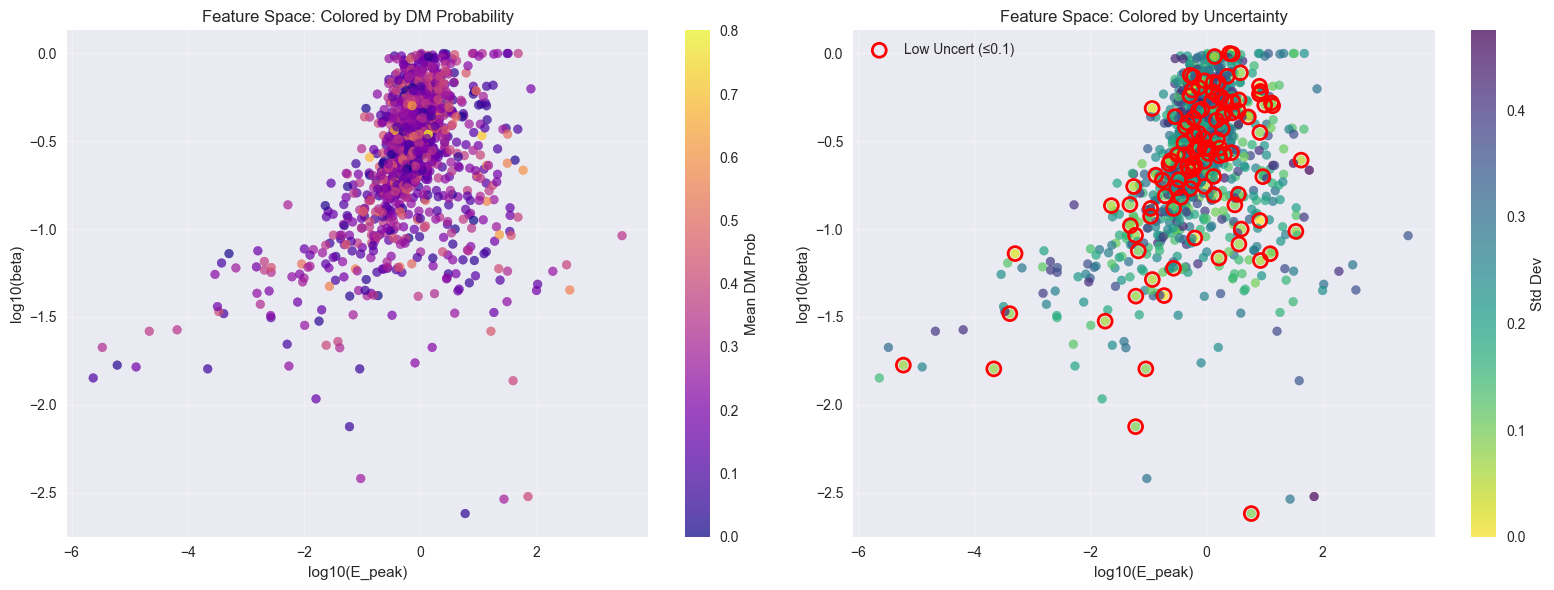

In [444]:
# Feature space analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Feature space colored by mean probability
ax1 = axes[0]
scatter = ax1.scatter(unids_log[:, 0], unids_log[:, 1], 
                     c=unids_mean, cmap='plasma', alpha=0.7, s=40)
plt.colorbar(scatter, ax=ax1, label='Mean DM Prob')
ax1.set_xlabel('log10(E_peak)')
ax1.set_ylabel('log10(beta)')
ax1.set_title('Feature Space: Colored by DM Probability')
ax1.grid(True, alpha=0.3)

# Highlight high confidence candidates
if len(high_conf_indices) > 0:
    ax1.scatter(unids_log[high_conf_indices, 0], unids_log[high_conf_indices, 1], 
               s=100, facecolors='none', edgecolors='red', linewidth=2, 
               label=f'High Conf (≥{p_cut_high:.0%})')
    ax1.legend()

# Feature space colored by uncertainty
ax2 = axes[1]
scatter2 = ax2.scatter(unids_log[:, 0], unids_log[:, 1], 
                      c=unids_std, cmap='viridis_r', alpha=0.7, s=40)
plt.colorbar(scatter2, ax=ax2, label='Std Dev')
ax2.set_xlabel('log10(E_peak)')
ax2.set_ylabel('log10(beta)')
ax2.set_title('Feature Space: Colored by Uncertainty')
ax2.grid(True, alpha=0.3)

# Highlight low uncertainty candidates
if len(low_uncertainty_indices) > 0:
    ax2.scatter(unids_log[low_uncertainty_indices, 0], unids_log[low_uncertainty_indices, 1], 
               s=100, facecolors='none', edgecolors='red', linewidth=2, 
               label=f'Low Uncert (≤{uncertainty_threshold})')
    ax2.legend()

plt.tight_layout()
plt.show()


In [445]:
# Create DataFrame for top candidates
top_20_indices = np.argsort(unids_mean)[-20:]  # Top 20 by mean probability
top_candidates_df = pd.DataFrame({
    'Source_ID': top_20_indices,
    'Mean_Prob': unids_mean[top_20_indices],
    'Std_Dev': unids_std[top_20_indices],
    'Median_Prob': unids_median[top_20_indices],
    'Min_Prob': unids_min[top_20_indices],
    'Max_Prob': unids_max[top_20_indices],
    # CAMBIO: Incluir las 4 características
    'E_peak': unids_3F_data[top_20_indices, 0],
    'Beta': unids_3F_data[top_20_indices, 1],
    'Sigma_det': unids_3F_data[top_20_indices, 2],
    'Beta_Rel': unids_3F_data[top_20_indices, 3],
    # CAMBIO: Log de las 4 características
    'log_E_peak': unids_log[top_20_indices, 0],
    'log_Beta': unids_log[top_20_indices, 1],
    'log_Sigma_det': unids_log[top_20_indices, 2],
    'log_Beta_Rel': unids_log[top_20_indices, 3]
})

# Sort by mean probability (descending)
top_candidates_df = top_candidates_df.sort_values('Mean_Prob', ascending=False)
top_candidates_df = top_candidates_df.reset_index(drop=True)

print("TOP 20 DARK MATTER CANDIDATES - ANN 4F:")
print("="*80)
display(top_candidates_df.round(4))

TOP 20 DARK MATTER CANDIDATES - ANN 4F:


,Source_ID,Mean_Prob,Std_Dev,Median_Prob,Min_Prob,Max_Prob,E_peak,Beta,Sigma_det,Beta_Rel,log_E_peak,log_Beta,log_Sigma_det,log_Beta_Rel
0,1046,0.8007,0.3757,0.9780,0.1321,0.9957,1.3713,0.3462,4.3628,0.7048,0.1371,-0.4607,0.6398,-0.1519
1,146,0.7098,0.3584,0.8235,0.0952,0.9751,11.4980,0.3400,9.0474,0.5353,1.0606,-0.4685,0.9565,-0.2714
2,1006,0.6943,0.2470,0.7887,0.4142,0.9775,0.3582,0.3640,5.4401,0.4775,-0.4459,-0.4389,0.7356,-0.3211
3,172,0.6685,0.2421,0.7296,0.2777,0.9330,0.1341,0.2563,5.5749,1.1498,-0.8725,-0.5913,0.7462,0.0606
4,1072,0.6424,0.3061,0.7405,0.1629,0.9835,0.7199,0.5041,4.6202,0.6407,-0.1427,-0.2975,0.6647,-0.1933
5,781,0.6314,0.2576,0.6742,0.3259,0.9523,1.0893,0.5408,6.4758,0.4262,0.0371,-0.2670,0.8113,-0.3704
6,847,0.6170,0.2647,0.6513,0.2604,0.9745,22.9990,0.0929,7.6952,0.8827,1.3617,-1.0320,0.8862,-0.0542
7,821,0.6087,0.4137,0.8549,0.1207,0.9811,1.5437,0.6922,9.8576,0.3112,0.1886,-0.1598,0.9938,-0.5070
8,1010,0.5942,0.4751,0.8755,0.0000,0.9982,58.7180,0.2163,4.1131,1.2963,1.7688,-0.6649,0.6142,0.1127
9,785,0.5932,0.4525,0.8471,0.0000,0.9976,0.7870,0.2986,7.3567,0.4451,-0.1040,-0.5249,0.8667,-0.3516


/var/folders/m8/9rd44wvx47j51lczw45sffl40000gn/T/ipykernel_6467/1737556152.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(valid_data, labels=valid_labels)


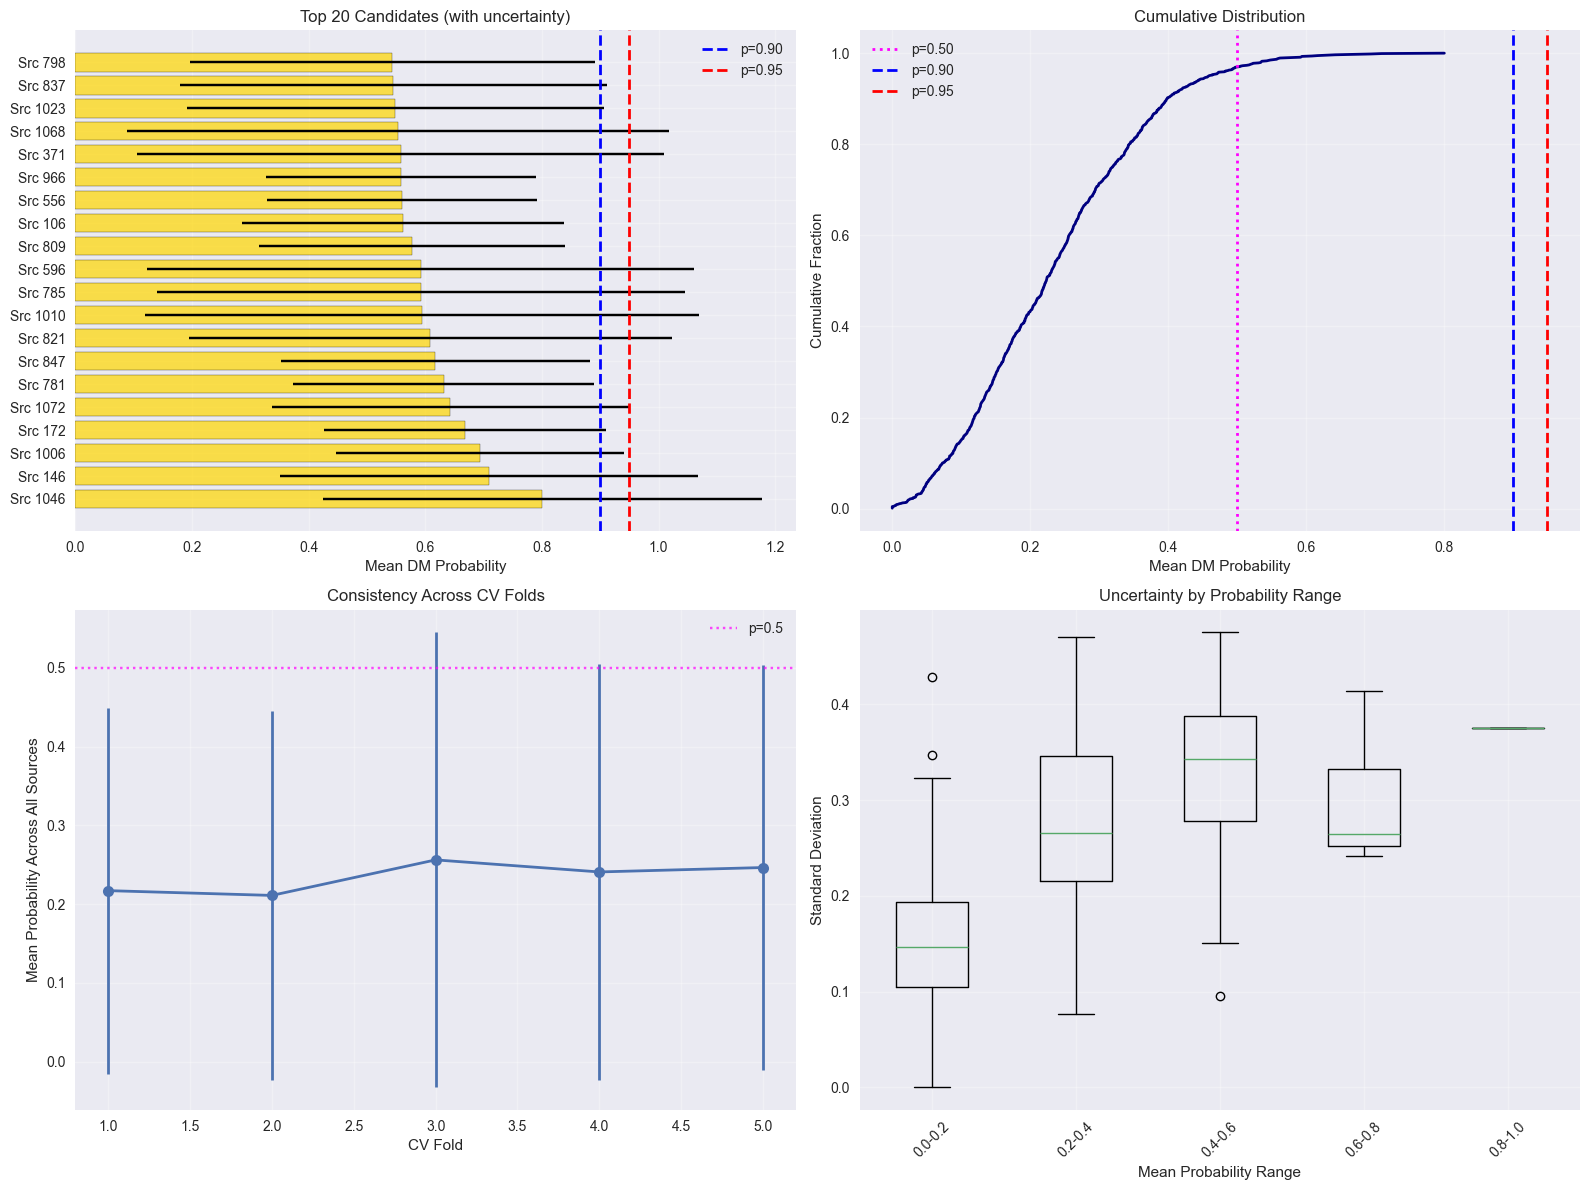

In [446]:
# Visualization of top candidates
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top candidates bar plot
ax1 = axes[0, 0]
y_pos = range(len(top_candidates_df))
bars = ax1.barh(y_pos, top_candidates_df['Mean_Prob'], 
               xerr=top_candidates_df['Std_Dev'], 
               alpha=0.7, color='gold', edgecolor='black')
ax1.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax1.axvline(0.95, color='red', linestyle='--', linewidth=2, label='p=0.95')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([f"Src {idx}" for idx in top_candidates_df['Source_ID']])
ax1.set_xlabel('Mean DM Probability')
ax1.set_title('Top 20 Candidates (with uncertainty)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Cumulative distribution
ax2 = axes[0, 1]
sorted_probs = np.sort(unids_mean)
cumulative = np.arange(1, len(sorted_probs) + 1) / len(sorted_probs)
ax2.plot(sorted_probs, cumulative, linewidth=2, color='navy')
ax2.axvline(0.50, color='magenta', linestyle=':', linewidth=2, label='p=0.50')
ax2.axvline(0.90, color='blue', linestyle='--', linewidth=2, label='p=0.90')
ax2.axvline(0.95, color='red', linestyle='--', linewidth=2, label='p=0.95')
ax2.set_xlabel('Mean DM Probability')
ax2.set_ylabel('Cumulative Fraction')
ax2.set_title('Cumulative Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Cross-validation fold consistency
ax3 = axes[1, 0]
fold_means = np.mean(prob_data, axis=0)
fold_stds = np.std(prob_data, axis=0)
ax3.errorbar(range(1, N_sample + 1), fold_means, yerr=fold_stds, 
            marker='o', linewidth=2, markersize=8, capsize=5)
ax3.axhline(0.5, color='magenta', linestyle=':', alpha=0.7, label='p=0.5')
ax3.set_xlabel('CV Fold')
ax3.set_ylabel('Mean Probability Across All Sources')
ax3.set_title('Consistency Across CV Folds')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Box plot by probability ranges
ax4 = axes[1, 1]
prob_ranges = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
range_data = []
for i in range(5):
    low, high = i*0.2, (i+1)*0.2
    mask = (unids_mean >= low) & (unids_mean < high)
    if np.any(mask):
        range_data.append(unids_std[mask])
    else:
        range_data.append([])

valid_data = [data for data in range_data if len(data) > 0]
valid_labels = [prob_ranges[i] for i, data in enumerate(range_data) if len(data) > 0]

if valid_data:
    ax4.boxplot(valid_data, labels=valid_labels)
    ax4.set_xlabel('Mean Probability Range')
    ax4.set_ylabel('Standard Deviation')
    ax4.set_title('Uncertainty by Probability Range')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [447]:
results_df = pd.DataFrame({
    'Source_ID': range(N_unids),
    'Mean_Prob': unids_mean,
    'Std_Dev': unids_std,
    'Median_Prob': unids_median,
    'Q25_Prob': unids_q25,
    'Q75_Prob': unids_q75,
    'Min_Prob': unids_min,
    'Max_Prob': unids_max,
    # CAMBIO: Incluir las 4 características originales
    'E_peak': unids_3F_data[:, 0],
    'Beta': unids_3F_data[:, 1],
    'Sigma_det': unids_3F_data[:, 2],
    'Beta_Rel': unids_3F_data[:, 3],
    # CAMBIO: Log-transformadas de las 4 características
    'log_E_peak': unids_log[:, 0],
    'log_Beta': unids_log[:, 1],
    'log_Sigma_det': unids_log[:, 2],
    'log_Beta_Rel': unids_log[:, 3]
})

# Add candidate classification flags
results_df['Very_High_Conf'] = unids_mean >= 0.95
results_df['High_Conf'] = (unids_mean >= p_cut_high) & (unids_mean < 0.95)
results_df['Moderate_Conf'] = (unids_mean >= p_cut_moderate) & (unids_mean < p_cut_high)
results_df['Low_Uncertainty'] = unids_std <= uncertainty_threshold

# Sort by mean probability
results_df = results_df.sort_values('Mean_Prob', ascending=False).reset_index(drop=True)

# Save results - CAMBIO: Nombre de archivo específico para 4F
results_df.to_csv('./TFG_analysis/4F/unid_dm_analysis_complete_results_4F_run3.csv', index=False)
print(f"Complete results saved to './TFG_analysis/4F/unid_dm_analysis_complete_results_4F_run3.csv'")
print(f"Total sources analyzed: {len(results_df)}")

# Display summary by category
print("\nSUMMARY BY CANDIDATE CATEGORY - ANN 4F:")
print("="*50)
categories = ['Very_High_Conf', 'High_Conf', 'Moderate_Conf', 'Low_Uncertainty']
for cat in categories:
    count = results_df[cat].sum()
    if count > 0:
        mean_prob = results_df[results_df[cat]]['Mean_Prob'].mean()
        mean_uncert = results_df[results_df[cat]]['Std_Dev'].mean()
        print(f"{cat.replace('_', ' ')}: {count} sources (avg prob: {mean_prob:.3f}, avg uncert: {mean_uncert:.3f})")


Complete results saved to './TFG_analysis/4F/unid_dm_analysis_complete_results_4F_run3.csv'
Total sources analyzed: 1125

SUMMARY BY CANDIDATE CATEGORY - ANN 4F:
Moderate Conf: 35 sources (avg prob: 0.570, avg uncert: 0.340)
Low Uncertainty: 110 sources (avg prob: 0.067, avg uncert: 0.067)


In [448]:
print("\nANÁLISIS DE CARACTERÍSTICAS 4F:")
print("="*50)

# Estadísticas de las características adicionales
print("NUEVAS CARACTERÍSTICAS (sigma_det y beta_Rel):")
print(f"Sigma_det - Media: {unids_3F_data[:, 2].mean():.4f}, Rango: [{unids_3F_data[:, 2].min():.4f}, {unids_3F_data[:, 2].max():.4f}]")
print(f"Beta_Rel - Media: {unids_3F_data[:, 3].mean():.4f}, Rango: [{unids_3F_data[:, 3].min():.4f}, {unids_3F_data[:, 3].max():.4f}]")

# Análisis de top candidates con características adicionales
print(f"\nTOP 5 CANDIDATES - CARACTERÍSTICAS EXTENDIDAS:")
print("-"*60)
for i in range(min(5, len(top_candidates_df))):
    row = top_candidates_df.iloc[i]
    print(f"Source {int(row['Source_ID']):3d}: p={row['Mean_Prob']:.4f}±{row['Std_Dev']:.4f}")
    print(f"  E_peak={row['E_peak']:.3e}, beta={row['Beta']:.4f}")
    print(f"  sigma_det={row['Sigma_det']:.4f}, beta_Rel={row['Beta_Rel']:.4f}")
    print()


ANÁLISIS DE CARACTERÍSTICAS 4F:
NUEVAS CARACTERÍSTICAS (sigma_det y beta_Rel):
Sigma_det - Media: 8.3103, Rango: [4.0556, 50.3083]
Beta_Rel - Media: 0.9365, Rango: [0.0009, 74.9542]

TOP 5 CANDIDATES - CARACTERÍSTICAS EXTENDIDAS:
------------------------------------------------------------
Source 1046: p=0.8007±0.3757
  E_peak=1.371e+00, beta=0.3462
  sigma_det=4.3628, beta_Rel=0.7048

Source 146: p=0.7098±0.3584
  E_peak=1.150e+01, beta=0.3400
  sigma_det=9.0474, beta_Rel=0.5353

Source 1006: p=0.6943±0.2470
  E_peak=3.582e-01, beta=0.3640
  sigma_det=5.4401, beta_Rel=0.4775

Source 172: p=0.6685±0.2421
  E_peak=1.341e-01, beta=0.2563
  sigma_det=5.5749, beta_Rel=1.1498

Source 1072: p=0.6424±0.3061
  E_peak=7.199e-01, beta=0.5041
  sigma_det=4.6202, beta_Rel=0.6407



In [449]:
# Generación de reporte específico para 4F
report_content_4f = f"""
{'='*80}
DARK MATTER CANDIDATE ANALYSIS REPORT - ANN 4F
{'='*80}

ANALYSIS PARAMETERS:
- Total unidentified sources: {N_unids}
- Features used: E_peak, beta, sigma_det, beta_Rel (4 characteristics)
- Cross-validation setup: {N_splits} splits × {N_Repeats} repeats = {N_sample} total folds
- High confidence threshold: {p_cut_high:.0%}
- Moderate confidence threshold: {p_cut_moderate:.0%}
- Low uncertainty threshold: {uncertainty_threshold}

OVERALL STATISTICS:
- Mean probability: {unids_mean.mean():.4f} ± {unids_mean.std():.4f}
- Median probability: {np.median(unids_mean):.4f}
- Mean uncertainty: {unids_std.mean():.4f} ± {unids_std.std():.4f}
- Probability range: [{unids_mean.min():.4f}, {unids_mean.max():.4f}]

FEATURE STATISTICS:
- E_peak range: [{unids_3F_data[:, 0].min():.3e}, {unids_3F_data[:, 0].max():.3e}]
- Beta range: [{unids_3F_data[:, 1].min():.4f}, {unids_3F_data[:, 1].max():.4f}]
- Sigma_det range: [{unids_3F_data[:, 2].min():.4f}, {unids_3F_data[:, 2].max():.4f}]
- Beta_Rel range: [{unids_3F_data[:, 3].min():.4f}, {unids_3F_data[:, 3].max():.4f}]

CANDIDATE SUMMARY:
- Very High Confidence (≥95%): {(unids_mean >= 0.95).sum()} sources
- High Confidence (≥{p_cut_high:.0%}): {((unids_mean >= p_cut_high) & (unids_mean < 0.95)).sum()} sources
- Moderate Confidence ({p_cut_moderate:.0%}-{p_cut_high:.0%}): {((unids_mean >= p_cut_moderate) & (unids_mean < p_cut_high)).sum()} sources
- Low Uncertainty (≤{uncertainty_threshold}): {(unids_std <= uncertainty_threshold).sum()} sources

TOP 10 CANDIDATES:
{'-'*50}
"""

for i in range(min(10, len(results_df))):
    row = results_df.iloc[i]
    report_content_4f += f"Source {int(row['Source_ID']):3d}: p={row['Mean_Prob']:.4f}±{row['Std_Dev']:.4f}\n"
    report_content_4f += f"  E_peak={row['E_peak']:.3e}, beta={row['Beta']:.4f}\n"
    report_content_4f += f"  sigma_det={row['Sigma_det']:.4f}, beta_Rel={row['Beta_Rel']:.4f}\n\n"

# Save report
with open('./TFG_analysis/4F/dm_candidates_report_4F.txt', 'w') as f:
    f.write(report_content_4f)

print("ANN 4F Analysis complete!")
print("Files generated:")
print("- ./TFG_analysis/4F/unid_dm_analysis_complete_results_4F.csv")
print("- ./TFG_analysis/4F/dm_candidates_report_4F.txt")

ANN 4F Analysis complete!
Files generated:
- ./TFG_analysis/4F/unid_dm_analysis_complete_results_4F.csv
- ./TFG_analysis/4F/dm_candidates_report_4F.txt


In [450]:
# Generate text report
report_content = f"""
{'='*80}
DARK MATTER CANDIDATE ANALYSIS REPORT
{'='*80}

ANALYSIS PARAMETERS:
- Total unidentified sources: {N_unids}
- Cross-validation setup: {N_splits} splits × {N_Repeats} repeats = {N_sample} total folds
- High confidence threshold: {p_cut_high:.0%}
- Moderate confidence threshold: {p_cut_moderate:.0%}
- Low uncertainty threshold: {uncertainty_threshold}

OVERALL STATISTICS:
- Mean probability: {unids_mean.mean():.4f} ± {unids_mean.std():.4f}
- Median probability: {np.median(unids_mean):.4f}
- Mean uncertainty: {unids_std.mean():.4f} ± {unids_std.std():.4f}

CANDIDATE SUMMARY:
- Very High Confidence (≥95%): {len(very_high_conf_indices)} sources
- High Confidence (≥{p_cut_high:.0%}): {len(high_conf_indices)} sources
- Moderate Confidence ({p_cut_moderate:.0%}-{p_cut_high:.0%}): {len(moderate_conf_indices)} sources
- Low Uncertainty (≤{uncertainty_threshold}): {len(low_uncertainty_indices)} sources

TOP 10 CANDIDATES:
{'-'*50}
"""

for i in range(min(10, len(results_df))):
    row = results_df.iloc[i]
    report_content += f"Source {row['Source_ID']:3d}: p={row['Mean_Prob']:.4f}±{row['Std_Dev']:.4f} "
    report_content += f"(E_peak={row['E_peak']:.3e}, beta={row['Beta']:.4f})\n"

# Save report
with open('./TFG_analysis/4F/dm_candidates_report_4F.txt', 'w') as f:
    f.write(report_content)

print("Analysis complete!")
print("Files generated:")
print("- unid_dm_analysis_complete_results_4F.csv")
print("- dm_candidates_report_4F.txt")

# Display final summary
print(f"\nFINAL SUMMARY:")
print(f"Analyzed {N_unids} unidentified sources")
print(f"Found {len(very_high_conf_indices)} very high confidence DM candidates (≥95%)")
print(f"Found {len(high_conf_indices)} high confidence DM candidates (≥{p_cut_high:.0%})")

Analysis complete!
Files generated:
- unid_dm_analysis_complete_results_4F.csv
- dm_candidates_report_4F.txt

FINAL SUMMARY:
Analyzed 1125 unidentified sources
Found 0 very high confidence DM candidates (≥95%)
Found 0 high confidence DM candidates (≥90%)


# Análisis de consenso entre 3 diferentes ejecuciones - 4F

In [451]:
from scipy import stats

# Configuración
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 10)

# Cargar los resultados de las 3 ejecuciones
execution_1 = pd.read_csv('./TFG_analysis/4F/unid_dm_analysis_complete_results_4F_run1.csv')
execution_2 = pd.read_csv('./TFG_analysis/4F/unid_dm_analysis_complete_results_4F_run2.csv')
execution_3 = pd.read_csv('./TFG_analysis/4F/unid_dm_analysis_complete_results_4F_run3.csv')

print(f"Ejecución 1: {len(execution_1)} fuentes")
print(f"Ejecución 2: {len(execution_2)} fuentes") 
print(f"Ejecución 3: {len(execution_3)} fuentes")

# Verificar que todas las ejecuciones tienen las mismas fuentes
assert len(execution_1) == len(execution_2) == len(execution_3), "Las ejecuciones tienen diferente número de fuentes"

n_sources = len(execution_1)
print(f"Total de fuentes analizadas: {n_sources}")

Ejecución 1: 1125 fuentes
Ejecución 2: 1125 fuentes
Ejecución 3: 1125 fuentes
Total de fuentes analizadas: 1125


In [452]:
# Crear DataFrame combinado con las probabilidades de las 3 ejecuciones
consensus_df = pd.DataFrame({
    'Source_ID': execution_1['Source_ID'],
    # CAMBIO: Incluir las 4 características
    'E_peak': execution_1['E_peak'],
    'Beta': execution_1['Beta'],
    'Sigma_det': execution_1['Sigma_det'],
    'Beta_Rel': execution_1['Beta_Rel'],
    # CAMBIO: Log-transformadas de las 4 características
    'log_E_peak': execution_1['log_E_peak'],
    'log_Beta': execution_1['log_Beta'],
    'log_Sigma_det': execution_1['log_Sigma_det'],
    'log_Beta_Rel': execution_1['log_Beta_Rel'],
    # Probabilidades de las 3 ejecuciones
    'Prob_Run1': execution_1['Mean_Prob'],
    'Prob_Run2': execution_2['Mean_Prob'], 
    'Prob_Run3': execution_3['Mean_Prob'],
    'Std_Run1': execution_1['Std_Dev'],
    'Std_Run2': execution_2['Std_Dev'],
    'Std_Run3': execution_3['Std_Dev']
})

consensus_df['Source_ID'] = consensus_df['Source_ID'].astype(int)

# Calcular estadísticas de consenso entre ejecuciones
consensus_df['Mean_Prob_Consensus'] = consensus_df[['Prob_Run1', 'Prob_Run2', 'Prob_Run3']].mean(axis=1)
consensus_df['Std_Prob_Consensus'] = consensus_df[['Prob_Run1', 'Prob_Run2', 'Prob_Run3']].std(axis=1, ddof=1)
consensus_df['Min_Prob_Consensus'] = consensus_df[['Prob_Run1', 'Prob_Run2', 'Prob_Run3']].min(axis=1)
consensus_df['Max_Prob_Consensus'] = consensus_df[['Prob_Run1', 'Prob_Run2', 'Prob_Run3']].max(axis=1)

# Calcular incertidumbre promedio dentro de cada ejecución
consensus_df['Mean_Uncertainty_Consensus'] = consensus_df[['Std_Run1', 'Std_Run2', 'Std_Run3']].mean(axis=1)

print("Estadísticas de consenso calculadas (ANN 4F):")
print(f"Probabilidad media general: {consensus_df['Mean_Prob_Consensus'].mean():.4f}")
print(f"Variabilidad entre ejecuciones: {consensus_df['Std_Prob_Consensus'].mean():.4f}")


Estadísticas de consenso calculadas (ANN 4F):
Probabilidad media general: 0.2255
Variabilidad entre ejecuciones: 0.0105


In [453]:
# Imprimir el tipo de dato que es source_id
print(f"Tipo de dato de Source_ID: {consensus_df['Source_ID'].dtype}")

consensus_df.head(10)

Tipo de dato de Source_ID: int64


,Source_ID,E_peak,Beta,Sigma_det,Beta_Rel,log_E_peak,log_Beta,log_Sigma_det,log_Beta_Rel,Prob_Run1,Prob_Run2,Prob_Run3,Std_Run1,Std_Run2,Std_Run3,Mean_Prob_Consensus,Std_Prob_Consensus,Min_Prob_Consensus,Max_Prob_Consensus,Mean_Uncertainty_Consensus
0,596,1.27120,0.4036,19.3727,0.230922,0.104214,-0.394049,1.287190,-0.636535,0.743540,0.752626,0.800736,0.376278,0.412541,0.375718,0.765634,0.030737,0.743540,0.800736,0.388179
1,1046,1.37130,0.3462,4.3628,0.704795,0.137132,-0.460673,0.639765,-0.151937,0.715582,0.685798,0.709839,0.361085,0.419974,0.358424,0.703740,0.015801,0.685798,0.715582,0.379828
2,397,0.41563,0.2016,11.0346,0.488591,-0.381293,-0.695509,1.042757,-0.311054,0.613486,0.610898,0.694292,0.289769,0.243270,0.247046,0.639558,0.047418,0.610898,0.694292,0.260029
3,556,0.07633,0.0593,4.2719,1.487352,-1.117305,-1.226945,0.630621,0.172414,0.599422,0.609156,0.668496,0.252753,0.257279,0.242082,0.625691,0.037388,0.599422,0.668496,0.250705
4,106,13.89300,0.1439,11.8161,0.610841,1.142796,-0.841939,1.072474,-0.214072,0.592519,0.606360,0.642447,0.227445,0.454615,0.306131,0.613775,0.025777,0.592519,0.642447,0.329397
5,371,13.85500,0.2306,5.0215,0.999133,1.141607,-0.637141,0.700833,-0.000377,0.585481,0.601802,0.631419,0.446047,0.489785,0.257589,0.606234,0.023287,0.585481,0.631419,0.397807
6,146,11.49800,0.3400,9.0474,0.535294,1.060622,-0.468521,0.956524,-0.271408,0.573270,0.598539,0.617015,0.345344,0.297605,0.264712,0.596275,0.021960,0.573270,0.617015,0.302554
7,622,0.33105,0.2370,4.4419,0.861603,-0.480106,-0.625252,0.647569,-0.064693,0.568527,0.585096,0.608671,0.303759,0.289575,0.413743,0.587431,0.020174,0.568527,0.608671,0.335692
8,162,0.18913,0.4006,5.0247,0.527459,-0.723240,-0.397289,0.701110,-0.277811,0.543977,0.583806,0.594206,0.360059,0.152869,0.475108,0.573996,0.026512,0.543977,0.594206,0.329346
9,136,0.95302,0.3488,13.6926,0.392202,-0.020898,-0.457424,1.136486,-0.406490,0.542432,0.564329,0.593211,0.415028,0.471041,0.452463,0.566657,0.025469,0.542432,0.593211,0.446177


In [454]:
# Definir criterios de robustez
MIN_PROB_THRESHOLD = 0.40  # Probabilidad mínima en todas las ejecuciones
MEAN_PROB_THRESHOLD = 0.45  # Probabilidad media entre ejecuciones
MAX_VARIABILITY = 0.15     # Máxima variabilidad entre ejecuciones

# Identificar candidatos robustos
robust_candidates = consensus_df[
    (consensus_df['Min_Prob_Consensus'] >= MIN_PROB_THRESHOLD) &
    (consensus_df['Mean_Prob_Consensus'] >= MEAN_PROB_THRESHOLD) &
    (consensus_df['Std_Prob_Consensus'] <= MAX_VARIABILITY)
].copy()

# Identificar candidatos consistentemente altos
consistent_high = consensus_df[
    (consensus_df['Mean_Prob_Consensus'] >= 0.45) &
    (consensus_df['Std_Prob_Consensus'] <= 0.10)
].copy()

# Identificar candidatos que aparecen en top 20 de todas las ejecuciones
top_20_run1 = set(execution_1.nlargest(20, 'Mean_Prob')['Source_ID'])
top_20_run2 = set(execution_2.nlargest(20, 'Mean_Prob')['Source_ID'])
top_20_run3 = set(execution_3.nlargest(20, 'Mean_Prob')['Source_ID'])

# Candidatos que aparecen en top 20 de al menos 2 ejecuciones
candidates_2_of_3 = (top_20_run1 & top_20_run2) | (top_20_run1 & top_20_run3) | (top_20_run2 & top_20_run3)
# Candidatos que aparecen en top 20 de todas las ejecuciones
candidates_all_3 = top_20_run1 & top_20_run2 & top_20_run3

print("ANÁLISIS DE ROBUSTEZ:")
print("="*50)
print(f"Candidatos robustos (criterios múltiples): {len(robust_candidates)}")
print(f"Candidatos consistentemente altos: {len(consistent_high)}")
print(f"Candidatos en top 20 de 2/3 ejecuciones: {len(candidates_2_of_3)}")
print(f"Candidatos en top 20 de 3/3 ejecuciones: {len(candidates_all_3)}")


ANÁLISIS DE ROBUSTEZ:
Candidatos robustos (criterios múltiples): 52
Candidatos consistentemente altos: 52
Candidatos en top 20 de 2/3 ejecuciones: 17
Candidatos en top 20 de 3/3 ejecuciones: 6


/var/folders/m8/9rd44wvx47j51lczw45sffl40000gn/T/ipykernel_6467/766363092.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot(prob_data, labels=['Ejec. 1', 'Ejec. 2', 'Ejec. 3'], patch_artist=True)


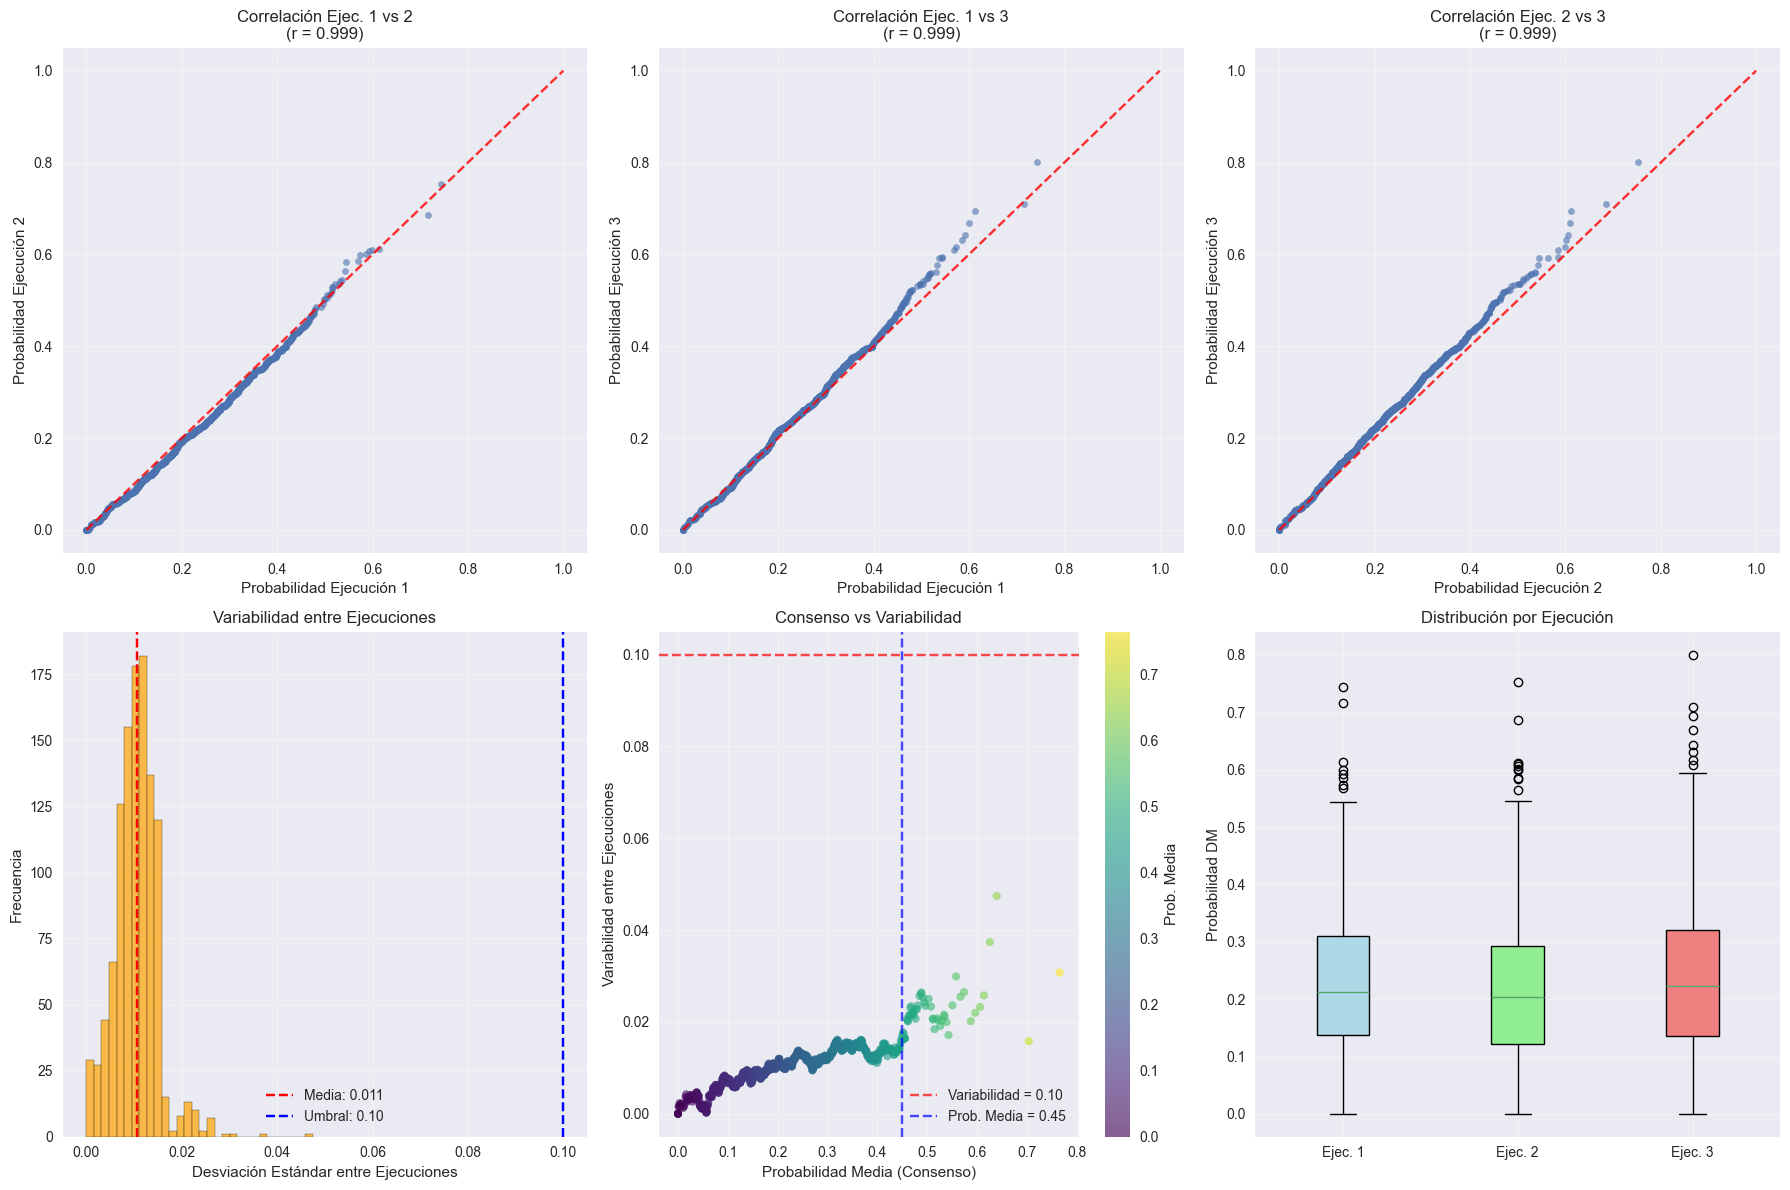

In [455]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Correlación entre ejecuciones (Run1 vs Run2)
ax1 = axes[0, 0]
ax1.scatter(consensus_df['Prob_Run1'], consensus_df['Prob_Run2'], alpha=0.6, s=20)
correlation_12 = consensus_df['Prob_Run1'].corr(consensus_df['Prob_Run2'])
ax1.plot([0, 1], [0, 1], 'r--', alpha=0.8)
ax1.set_xlabel('Probabilidad Ejecución 1')
ax1.set_ylabel('Probabilidad Ejecución 2')
ax1.set_title(f'Correlación Ejec. 1 vs 2\n(r = {correlation_12:.3f})')
ax1.grid(True, alpha=0.3)

# 2. Correlación Run1 vs Run3
ax2 = axes[0, 1]
ax2.scatter(consensus_df['Prob_Run1'], consensus_df['Prob_Run3'], alpha=0.6, s=20)
correlation_13 = consensus_df['Prob_Run1'].corr(consensus_df['Prob_Run3'])
ax2.plot([0, 1], [0, 1], 'r--', alpha=0.8)
ax2.set_xlabel('Probabilidad Ejecución 1')
ax2.set_ylabel('Probabilidad Ejecución 3')
ax2.set_title(f'Correlación Ejec. 1 vs 3\n(r = {correlation_13:.3f})')
ax2.grid(True, alpha=0.3)

# 3. Correlación Run2 vs Run3
ax3 = axes[0, 2]
ax3.scatter(consensus_df['Prob_Run2'], consensus_df['Prob_Run3'], alpha=0.6, s=20)
correlation_23 = consensus_df['Prob_Run2'].corr(consensus_df['Prob_Run3'])
ax3.plot([0, 1], [0, 1], 'r--', alpha=0.8)
ax3.set_xlabel('Probabilidad Ejecución 2')
ax3.set_ylabel('Probabilidad Ejecución 3')
ax3.set_title(f'Correlación Ejec. 2 vs 3\n(r = {correlation_23:.3f})')
ax3.grid(True, alpha=0.3)

# 4. Distribución de variabilidad entre ejecuciones
ax4 = axes[1, 0]
ax4.hist(consensus_df['Std_Prob_Consensus'], bins=30, alpha=0.7, color='orange', edgecolor='black')
ax4.axvline(consensus_df['Std_Prob_Consensus'].mean(), color='red', linestyle='--', 
           label=f'Media: {consensus_df["Std_Prob_Consensus"].mean():.3f}')
ax4.axvline(0.10, color='blue', linestyle='--', label='Umbral: 0.10')
ax4.set_xlabel('Desviación Estándar entre Ejecuciones')
ax4.set_ylabel('Frecuencia')
ax4.set_title('Variabilidad entre Ejecuciones')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Probabilidad media vs variabilidad
ax5 = axes[1, 1]
scatter = ax5.scatter(consensus_df['Mean_Prob_Consensus'], consensus_df['Std_Prob_Consensus'], 
                     alpha=0.6, c=consensus_df['Mean_Prob_Consensus'], cmap='viridis', s=30)
plt.colorbar(scatter, ax=ax5, label='Prob. Media')
ax5.axhline(0.10, color='red', linestyle='--', alpha=0.7, label='Variabilidad = 0.10')
ax5.axvline(0.45, color='blue', linestyle='--', alpha=0.7, label='Prob. Media = 0.45')
ax5.set_xlabel('Probabilidad Media (Consenso)')
ax5.set_ylabel('Variabilidad entre Ejecuciones')
ax5.set_title('Consenso vs Variabilidad')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Boxplot de probabilidades por ejecución
ax6 = axes[1, 2]
prob_data = [consensus_df['Prob_Run1'], consensus_df['Prob_Run2'], consensus_df['Prob_Run3']]
bp = ax6.boxplot(prob_data, labels=['Ejec. 1', 'Ejec. 2', 'Ejec. 3'], patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax6.set_ylabel('Probabilidad DM')
ax6.set_title('Distribución por Ejecución')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


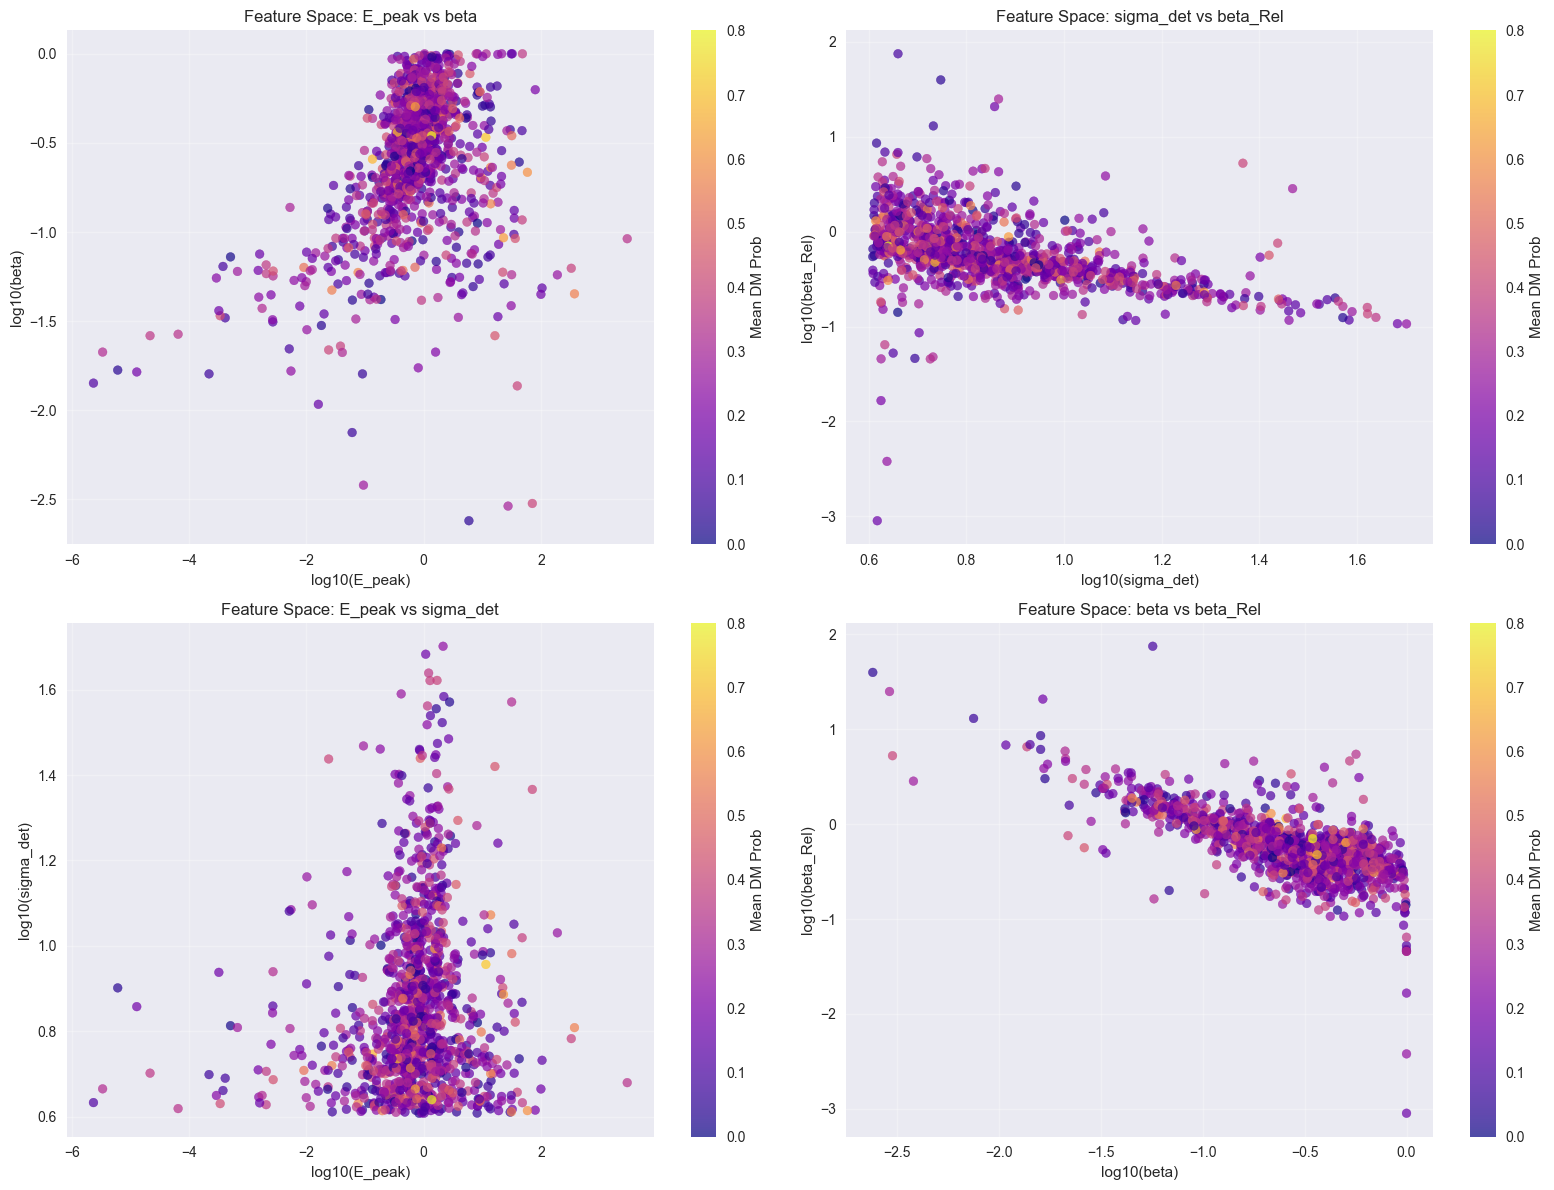

In [456]:

# Cell 8 - MODIFICADO PARA 4F: Feature space analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Feature space 1: E_peak vs beta (como en 2F)
ax1 = axes[0, 0]
scatter = ax1.scatter(unids_log[:, 0], unids_log[:, 1], 
                     c=unids_mean, cmap='plasma', alpha=0.7, s=40)
plt.colorbar(scatter, ax=ax1, label='Mean DM Prob')
ax1.set_xlabel('log10(E_peak)')
ax1.set_ylabel('log10(beta)')
ax1.set_title('Feature Space: E_peak vs beta')
ax1.grid(True, alpha=0.3)

# Feature space 2: sigma_det vs beta_Rel (nuevas características)
ax2 = axes[0, 1]
scatter2 = ax2.scatter(unids_log[:, 2], unids_log[:, 3], 
                      c=unids_mean, cmap='plasma', alpha=0.7, s=40)
plt.colorbar(scatter2, ax=ax2, label='Mean DM Prob')
ax2.set_xlabel('log10(sigma_det)')
ax2.set_ylabel('log10(beta_Rel)')
ax2.set_title('Feature Space: sigma_det vs beta_Rel')
ax2.grid(True, alpha=0.3)

# Feature space 3: E_peak vs sigma_det
ax3 = axes[1, 0]
scatter3 = ax3.scatter(unids_log[:, 0], unids_log[:, 2], 
                      c=unids_mean, cmap='plasma', alpha=0.7, s=40)
plt.colorbar(scatter3, ax=ax3, label='Mean DM Prob')
ax3.set_xlabel('log10(E_peak)')
ax3.set_ylabel('log10(sigma_det)')
ax3.set_title('Feature Space: E_peak vs sigma_det')
ax3.grid(True, alpha=0.3)

# Feature space 4: beta vs beta_Rel
ax4 = axes[1, 1]
scatter4 = ax4.scatter(unids_log[:, 1], unids_log[:, 3], 
                      c=unids_mean, cmap='plasma', alpha=0.7, s=40)
plt.colorbar(scatter4, ax=ax4, label='Mean DM Prob')
ax4.set_xlabel('log10(beta)')
ax4.set_ylabel('log10(beta_Rel)')
ax4.set_title('Feature Space: beta vs beta_Rel')
ax4.grid(True, alpha=0.3)

# Highlight high confidence candidates en todos los subplots
if len(high_conf_indices) > 0:
    for ax in [ax1, ax2, ax3, ax4]:
        ax.scatter(unids_log[high_conf_indices, 0], unids_log[high_conf_indices, 1], 
                  s=100, facecolors='none', edgecolors='red', linewidth=2)

plt.tight_layout()
plt.show()

In [457]:
consensus_df_sorted = consensus_df.sort_values('Mean_Prob_Consensus', ascending=False).reset_index(drop=True)

print("TOP 15 CANDIDATOS DE CONSENSO - ANN 4F:")
print("="*100)
print("Source | Prob_Consensus | Variabilidad | Run1   | Run2   | Run3   | E_peak    | Beta     | Sigma_det | Beta_Rel")
print("-"*100)

for i in range(min(15, len(consensus_df_sorted))):
    row = consensus_df_sorted.iloc[i]
    source_id = int(row['Source_ID'])
    mean_prob = float(row['Mean_Prob_Consensus'])
    std_prob = float(row['Std_Prob_Consensus'])
    prob1 = float(row['Prob_Run1'])
    prob2 = float(row['Prob_Run2'])
    prob3 = float(row['Prob_Run3'])
    e_peak = float(row['E_peak'])
    beta = float(row['Beta'])
    # CAMBIO: Incluir las nuevas características
    sigma_det = float(row['Sigma_det'])
    beta_rel = float(row['Beta_Rel'])
    
    print(f"{source_id:6d} | {mean_prob:12.4f} | {std_prob:10.4f} | "
          f"{prob1:5.3f} | {prob2:5.3f} | {prob3:5.3f} | "
          f"{e_peak:8.3e} | {beta:7.4f} | {sigma_det:8.4f} | {beta_rel:7.4f}")

# El resto del análisis de candidatos permanece igual...
print(f"\nCANDIDATOS EN TOP 20 DE TODAS LAS EJECUCIONES:")
print("="*50)
if candidates_all_3:
    for source_id in candidates_all_3:
        source_id = int(source_id)
        row = consensus_df[consensus_df['Source_ID'] == source_id].iloc[0]
        mean_prob = float(row['Mean_Prob_Consensus'])
        std_prob = float(row['Std_Prob_Consensus'])
        print(f"Source {source_id:4d}: {mean_prob:.4f} ± {std_prob:.4f}")
else:
    print("No hay candidatos que aparezcan en el top 20 de todas las ejecuciones")

print(f"\nCANDIDATOS EN TOP 20 DE AL MENOS 2 EJECUCIONES:")
print("="*50)
for source_id in candidates_2_of_3:
    source_id = int(source_id)
    row = consensus_df[consensus_df['Source_ID'] == source_id].iloc[0]
    mean_prob = float(row['Mean_Prob_Consensus'])
    std_prob = float(row['Std_Prob_Consensus'])
    in_run1 = source_id in top_20_run1
    in_run2 = source_id in top_20_run2  
    in_run3 = source_id in top_20_run3
    runs_in_top20 = sum([in_run1, in_run2, in_run3])
    print(f"Source {source_id:4d}: {mean_prob:.4f} ± {std_prob:.4f} "
          f"(en {runs_in_top20}/3 ejecuciones)")


TOP 15 CANDIDATOS DE CONSENSO - ANN 4F:
Source | Prob_Consensus | Variabilidad | Run1   | Run2   | Run3   | E_peak    | Beta     | Sigma_det | Beta_Rel
----------------------------------------------------------------------------------------------------
   596 |       0.7656 |     0.0307 | 0.744 | 0.753 | 0.801 | 1.271e+00 |  0.4036 |  19.3727 |  0.2309
  1046 |       0.7037 |     0.0158 | 0.716 | 0.686 | 0.710 | 1.371e+00 |  0.3462 |   4.3628 |  0.7048
   397 |       0.6396 |     0.0474 | 0.613 | 0.611 | 0.694 | 4.156e-01 |  0.2016 |  11.0346 |  0.4886
   556 |       0.6257 |     0.0374 | 0.599 | 0.609 | 0.668 | 7.633e-02 |  0.0593 |   4.2719 |  1.4874
   106 |       0.6138 |     0.0258 | 0.593 | 0.606 | 0.642 | 1.389e+01 |  0.1439 |  11.8161 |  0.6108
   371 |       0.6062 |     0.0233 | 0.585 | 0.602 | 0.631 | 1.386e+01 |  0.2306 |   5.0215 |  0.9991
   146 |       0.5963 |     0.0220 | 0.573 | 0.599 | 0.617 | 1.150e+01 |  0.3400 |   9.0474 |  0.5353
   622 |       0.5874 |     0.020

In [458]:
# Calcular métricas de estabilidad global
correlations = [correlation_12, correlation_13, correlation_23]
mean_correlation = np.mean(correlations)
std_correlation = np.std(correlations, ddof=1)

# Calcular coeficiente de variación promedio
cv_per_source = consensus_df['Std_Prob_Consensus'] / consensus_df['Mean_Prob_Consensus']
cv_per_source = cv_per_source[np.isfinite(cv_per_source)]
mean_cv = cv_per_source.mean()

# Concordancia en rankings (Kendall's tau)
from scipy.stats import kendalltau

rank_1 = execution_1.sort_values('Mean_Prob', ascending=False)['Source_ID'].values
rank_2 = execution_2.sort_values('Mean_Prob', ascending=False)['Source_ID'].values  
rank_3 = execution_3.sort_values('Mean_Prob', ascending=False)['Source_ID'].values

top_n = min(100, len(rank_1))
tau_12, p_12 = kendalltau(rank_1[:top_n], rank_2[:top_n])
tau_13, p_13 = kendalltau(rank_1[:top_n], rank_3[:top_n])
tau_23, p_23 = kendalltau(rank_2[:top_n], rank_3[:top_n])

mean_tau = np.mean([tau_12, tau_13, tau_23])

print("MÉTRICAS DE ESTABILIDAD DEL MODELO ANN 4F:")
print("="*50)
print(f"Correlación promedio entre ejecuciones: {mean_correlation:.4f} ± {std_correlation:.4f}")
print(f"Coeficiente de variación promedio: {mean_cv:.4f}")
print(f"Concordancia de rankings (Kendall's τ): {mean_tau:.4f}")
print(f"Número de fuentes con variabilidad < 0.10: {(consensus_df['Std_Prob_Consensus'] < 0.10).sum()}")
print(f"Porcentaje de fuentes estables: {(consensus_df['Std_Prob_Consensus'] < 0.10).mean()*100:.1f}%")


MÉTRICAS DE ESTABILIDAD DEL MODELO ANN 4F:
Correlación promedio entre ejecuciones: 0.9990 ± 0.0004
Coeficiente de variación promedio: 0.0617
Concordancia de rankings (Kendall's τ): -0.0241
Número de fuentes con variabilidad < 0.10: 1125
Porcentaje de fuentes estables: 100.0%


In [459]:
# Guardar DataFrame de consenso
consensus_df_sorted.to_csv('./TFG_analysis/4F/consensus_analysis_ann_4f.csv', index=False)

# Generar reporte de consenso - CAMBIO: incluir información de 4 características
report_content = f"""
{'='*80}
REPORTE DE CONSENSO - MODELO ANN 4F (3 EJECUCIONES)
{'='*80}

PARÁMETROS DEL ANÁLISIS:
- Número de fuentes analizadas: {len(consensus_df)}
- Características utilizadas: E_peak, beta, sigma_det, beta_Rel (4F)
- Número de ejecuciones independientes: 3
- Validación cruzada por ejecución: 5 folds × 2 repeticiones = 10 evaluaciones

ESTABILIDAD DEL MODELO:
- Correlación promedio entre ejecuciones: {mean_correlation:.4f} ± {std_correlation:.4f}
- Concordancia de rankings (Kendall's τ): {mean_tau:.4f}
- Coeficiente de variación promedio: {mean_cv:.4f}
- Fuentes con baja variabilidad (<0.10): {(consensus_df['Std_Prob_Consensus'] < 0.10).sum()} ({(consensus_df['Std_Prob_Consensus'] < 0.10).mean()*100:.1f}%)

ESTADÍSTICAS DE CONSENSO:
- Probabilidad media general: {consensus_df['Mean_Prob_Consensus'].mean():.4f} ± {consensus_df['Mean_Prob_Consensus'].std():.4f}
- Variabilidad media entre ejecuciones: {consensus_df['Std_Prob_Consensus'].mean():.4f}
- Rango de probabilidades: [{consensus_df['Mean_Prob_Consensus'].min():.4f}, {consensus_df['Mean_Prob_Consensus'].max():.4f}]

CANDIDATOS ROBUSTOS:
- Candidatos con criterios múltiples: {len(robust_candidates)}
- Candidatos en top 20 de todas las ejecuciones: {len(candidates_all_3)}
- Candidatos en top 20 de al menos 2 ejecuciones: {len(candidates_2_of_3)}

TOP 10 CANDIDATOS DE CONSENSO:
{'-'*70}
"""

for i in range(min(10, len(consensus_df_sorted))):
    row = consensus_df_sorted.iloc[i]
    source_id = int(row['Source_ID'])
    mean_prob = float(row['Mean_Prob_Consensus'])
    std_prob = float(row['Std_Prob_Consensus'])
    e_peak = float(row['E_peak'])
    beta = float(row['Beta'])
    # CAMBIO: Incluir las nuevas características en el reporte
    sigma_det = float(row['Sigma_det'])
    beta_rel = float(row['Beta_Rel'])
    
    report_content += f"Source {source_id:4d}: p={mean_prob:.4f}±{std_prob:.4f}\n"
    report_content += f"  E_peak={e_peak:.3e}, beta={beta:.4f}\n"
    report_content += f"  sigma_det={sigma_det:.4f}, beta_Rel={beta_rel:.4f}\n\n"

report_content += f"""
INTERPRETACIÓN:
- El modelo ANN 4F muestra {'alta' if mean_correlation > 0.8 else 'moderada' if mean_correlation > 0.6 else 'baja'} correlación entre ejecuciones (r={mean_correlation:.3f})
- La variabilidad promedio de {consensus_df['Std_Prob_Consensus'].mean():.3f} indica {'alta' if consensus_df['Std_Prob_Consensus'].mean() < 0.1 else 'moderada' if consensus_df['Std_Prob_Consensus'].mean() < 0.2 else 'baja'} estabilidad
- Se identificaron {len(candidates_2_of_3)} candidatos que aparecen consistentemente en rankings altos
- Las características adicionales (sigma_det, beta_Rel) permiten una caracterización más detallada de los candidatos
"""

# Guardar reporte
with open('./TFG_analysis/4F/consensus_report_ann_4f.txt', 'w') as f:
    f.write(report_content)

print("ANÁLISIS COMPLETADO - ANN 4F:")
print("- consensus_analysis_ann_4f.csv: Datos completos de consenso")
print("- consensus_report_ann_4f.txt: Reporte detallado")
print(f"\nCONCLUSIÓN PRINCIPAL:")
print(f"El modelo ANN 4F muestra correlación {mean_correlation:.3f} entre ejecuciones")
print(f"Se identificaron {len(candidates_2_of_3)} candidatos robustos para análisis posterior")


ANÁLISIS COMPLETADO - ANN 4F:
- consensus_analysis_ann_4f.csv: Datos completos de consenso
- consensus_report_ann_4f.txt: Reporte detallado

CONCLUSIÓN PRINCIPAL:
El modelo ANN 4F muestra correlación 0.999 entre ejecuciones
Se identificaron 17 candidatos robustos para análisis posterior


In [460]:
# Comparación rápida de características entre candidatos top
print("\nANÁLISIS DE CARACTERÍSTICAS DE TOP CANDIDATOS:")
print("="*60)

top_5_candidates = consensus_df_sorted.head(5)
print("RANGOS DE CARACTERÍSTICAS EN TOP 5 CANDIDATOS:")
print(f"E_peak: {top_5_candidates['E_peak'].min():.3e} - {top_5_candidates['E_peak'].max():.3e}")
print(f"Beta: {top_5_candidates['Beta'].min():.4f} - {top_5_candidates['Beta'].max():.4f}")
print(f"Sigma_det: {top_5_candidates['Sigma_det'].min():.4f} - {top_5_candidates['Sigma_det'].max():.4f}")
print(f"Beta_Rel: {top_5_candidates['Beta_Rel'].min():.4f} - {top_5_candidates['Beta_Rel'].max():.4f}")

print("\nCOMPARACIÓN CON POBLACIÓN GENERAL:")
print(f"E_peak - Top 5 vs General: {top_5_candidates['E_peak'].mean():.3e} vs {consensus_df['E_peak'].mean():.3e}")
print(f"Beta - Top 5 vs General: {top_5_candidates['Beta'].mean():.4f} vs {consensus_df['Beta'].mean():.4f}")
print(f"Sigma_det - Top 5 vs General: {top_5_candidates['Sigma_det'].mean():.4f} vs {consensus_df['Sigma_det'].mean():.4f}")
print(f"Beta_Rel - Top 5 vs General: {top_5_candidates['Beta_Rel'].mean():.4f} vs {consensus_df['Beta_Rel'].mean():.4f}")


ANÁLISIS DE CARACTERÍSTICAS DE TOP CANDIDATOS:
RANGOS DE CARACTERÍSTICAS EN TOP 5 CANDIDATOS:
E_peak: 7.633e-02 - 1.389e+01
Beta: 0.0593 - 0.4036
Sigma_det: 4.2719 - 19.3727
Beta_Rel: 0.2309 - 1.4874

COMPARACIÓN CON POBLACIÓN GENERAL:
E_peak - Top 5 vs General: 3.405e+00 vs 6.036e+00
Beta - Top 5 vs General: 0.2309 vs 0.3476
Sigma_det - Top 5 vs General: 10.1716 vs 8.3103
Beta_Rel - Top 5 vs General: 0.7045 vs 0.9365
